In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model # This is the operative sklearn function we are using!
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv('C:/Users/jafon\Documents/PythonMaterials/Data/NYC-FBI-2013-Data.csv')

In [3]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [4]:
df = df.drop(['Rape\n(revised\ndefinition)1'], axis=1)


In [5]:
df.columns = ('City', 'Population', 'Violent Crime', 'Murder/Manslaughter', 'Rape', 'Robbery',
             'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny/Theft', 'Motor Vehicle Theft', 'Arson')
df.head()

,City,Population,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson
0,Adams Village,"1,861",0,0.000,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,3,4,16,223,53,165,5,nan


In [6]:
# (fixing nan's with dummy 0 values)
df.fillna(0, inplace=True)
df.head()

,City,Population,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson
0,Adams Village,"1,861",0,0.000,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,30,227,526,"4,090",705,"3,243",142,0.000
4,Albion Village,"6,388",23,0.000,3,4,16,223,53,165,5,0.000


In [7]:
df['Murder/Manslaughter'] = [int(i) for i in df['Murder/Manslaughter']]

In [8]:
df['Arson'] = [int(i) for i in df['Arson']]
df.head()

,City,Population,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson
0,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0
2,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0
3,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,0
4,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,0


In [9]:
# checked value counts for all columns (except population) - appears to be no crazy values
#...just a lot of crime.

In [10]:
df = df[:348] # deleting the junk at the end of the dataframe
df.tail()

,City,Population,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson
343,Woodbury Town,"10,685",3,0,0,2,1,541,9,529,3,0
344,Woodridge Village,829,7,0,0,0,7,17,8,9,0,0
345,Woodstock Town,"5,931",2,0,0,0,2,58,13,45,0,0
346,Yonkers,"199,134","1,036",6,25,390,615,"2,368",470,"1,662",236,10
347,Yorktown Town,"36,643",15,0,0,2,13,334,45,287,2,0


__Goals for this assignment:__
1. Build Regression Model to predict the outcome variable of: __property crimes.__
2. At the end, explain feature engineering and selection process.
    

In [11]:
# apparently gotta fix this s**t. Coolcoolcool.
df['Population'] = df['Population'].apply(lambda x: int(x.split()[0].replace(',', '')))

In [12]:
type(df.Population[344])

numpy.int64

In [13]:
df['Population Squared'] = [i**2 for i in df['Population']]
df['Population Squared'].head()

0       3463321
1       6640929
2       8099716
3    9595377936
4      40806544
Name: Population Squared, dtype: int64

In [14]:
dffix = df[['City', 'Violent Crime', 'Murder/Manslaughter', 'Rape',
       'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary',
       'Larceny/Theft', 'Motor Vehicle Theft', 'Arson', 'Population', 
           'Population Squared']]
dffix.head()

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson,Population,Population Squared
0,Adams Village,0,0,0,0,0,12,2,10,0,0,1861,3463321
1,Addison Town and Village,3,0,0,0,3,24,3,20,1,0,2577,6640929
2,Akron Village,3,0,0,0,3,16,1,15,0,0,2846,8099716
3,Albany,791,8,30,227,526,"4,090",705,"3,243",142,0,97956,9595377936
4,Albion Village,23,0,3,4,16,223,53,165,5,0,6388,40806544


In [15]:
# creating binary columns, as was requested 

dffix['Propertybool'] = [0 if i == 0 else 1 for i in dffix['Property Crime']]
dffix['Murder/Manslaughterbool'] = [0 if i == 0 else 1 for i in dffix['Murder/Manslaughter']]
dffix['Robberybool'] = [0 if i == 0 else 1 for i in dffix['Robbery']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is 

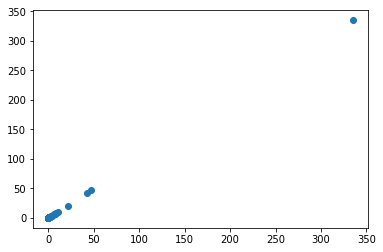

In [16]:
# Final check of the data

plt.scatter(x=dffix['Murder/Manslaughter'], y=dffix['Murder/Manslaughter'])
plt.show()

In [17]:
dffix.loc[dffix['Murder/Manslaughter'] > 300].head()

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson,Population,Population Squared,Propertybool,Murder/Manslaughterbool,Robberybool
216,New York,"52,384",335,"1,112","19,170","31,767","141,971","16,606","117,931","7,434",0,8396126,70494931807876,1,1,1


In [18]:
# It appears that the murder rate for NYC pushes all of the data to the left
# Have to adjust on a per capita analysis
# Here I am doing it per 10000 people

dffix['Murderper10k'] = (dffix['Murder/Manslaughter'] / (dffix['Population'] / 10000))
dffix.head()

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson,Population,Population Squared,Propertybool,Murder/Manslaughterbool,Robberybool,Murderper10k
0,Adams Village,0,0,0,0,0,12,2,10,0,0,1861,3463321,1,0,1,0.000
1,Addison Town and Village,3,0,0,0,3,24,3,20,1,0,2577,6640929,1,0,1,0.000
2,Akron Village,3,0,0,0,3,16,1,15,0,0,2846,8099716,1,0,1,0.000
3,Albany,791,8,30,227,526,"4,090",705,"3,243",142,0,97956,9595377936,1,1,1,0.817
4,Albion Village,23,0,3,4,16,223,53,165,5,0,6388,40806544,1,0,1,0.000


c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


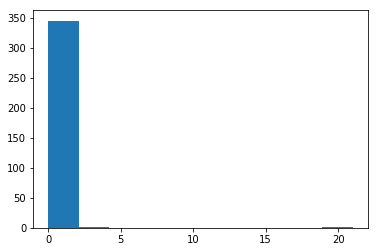

In [19]:
# Meh, that pushed everything down in a linear fashion. Let's try loggin it #lumberjacktime
dffix['Murderlogfxn'] = (dffix['Murder/Manslaughter'] / np.log(dffix['Population']))

plt.hist(dffix['Murderlogfxn'])
plt.show()


In [20]:
dffix['LogMurder'] = []
try:
    dffix['LogMurder'].append(np.log(dffix['Murder/Manslaughter']) / dffix['Population'])
except ValueError:
    dffix['LogMurder'].append(0)

ValueError: Length of values does not match length of index

In [21]:
dffix['LogMurder'] = (np.log(dffix['Murder/Manslaughter']) / dffix['Population'])


c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
dffix['LogMurder'] = [0 if x == float('-inf') else x for x in dffix['LogMurder']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
dffix.head()

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson,Population,Population Squared,Propertybool,Murder/Manslaughterbool,Robberybool,Murderper10k,Murderlogfxn,LogMurder
0,Adams Village,0,0,0,0,0,12,2,10,0,0,1861,3463321,1,0,1,0.000,0.000,0.000
1,Addison Town and Village,3,0,0,0,3,24,3,20,1,0,2577,6640929,1,0,1,0.000,0.000,0.000
2,Akron Village,3,0,0,0,3,16,1,15,0,0,2846,8099716,1,0,1,0.000,0.000,0.000
3,Albany,791,8,30,227,526,"4,090",705,"3,243",142,0,97956,9595377936,1,1,1,0.817,0.696,0.000
4,Albion Village,23,0,3,4,16,223,53,165,5,0,6388,40806544,1,0,1,0.000,0.000,0.000


In [24]:
dffix['LogMurder'] *= 100000 # trying to scale it back to something useful

# Also, don't run this more than once, or it will keep multiplying
# you'll have to go to the dataseries definition to reset it

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
dffix.head()

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson,Population,Population Squared,Propertybool,Murder/Manslaughterbool,Robberybool,Murderper10k,Murderlogfxn,LogMurder
0,Adams Village,0,0,0,0,0,12,2,10,0,0,1861,3463321,1,0,1,0.000,0.000,0.000
1,Addison Town and Village,3,0,0,0,3,24,3,20,1,0,2577,6640929,1,0,1,0.000,0.000,0.000
2,Akron Village,3,0,0,0,3,16,1,15,0,0,2846,8099716,1,0,1,0.000,0.000,0.000
3,Albany,791,8,30,227,526,"4,090",705,"3,243",142,0,97956,9595377936,1,1,1,0.817,0.696,2.123
4,Albion Village,23,0,3,4,16,223,53,165,5,0,6388,40806544,1,0,1,0.000,0.000,0.000


c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


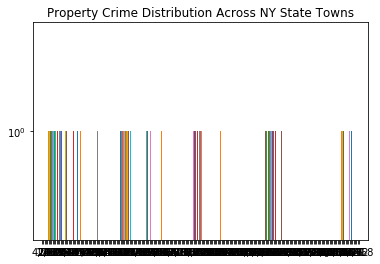

In [26]:
# Now that I have features set up, check residual distribution
# looking for normal distribution of errors

# But first, out of sheer curiosity - checking distribution of property crimes
plt.hist(x=dffix['Property Crime'], bins=5, log=True)
plt.title('Property Crime Distribution Across NY State Towns')
plt.show()

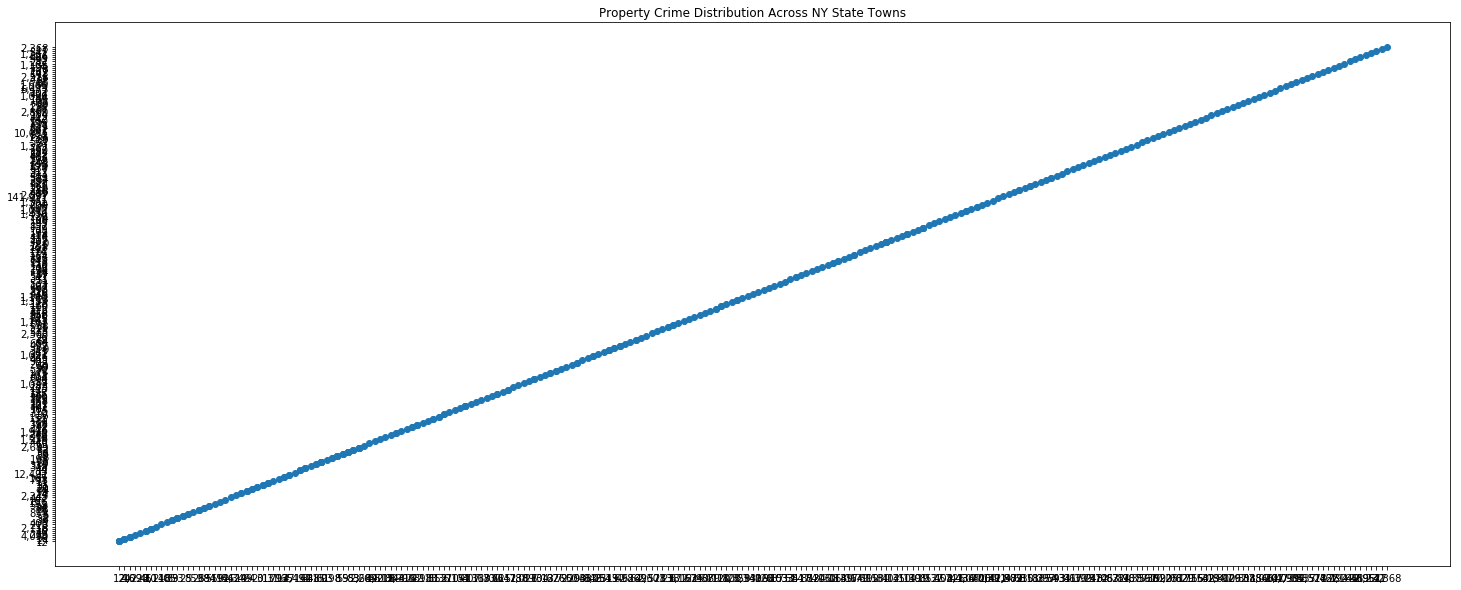

In [27]:
plt.figure(figsize=(25,10))

plt.scatter(x=dffix['Property Crime'], y=dffix['Property Crime'])
plt.title('Property Crime Distribution Across NY State Towns')
plt.show()

In [28]:
#okay, what ***are*** these^^^ values?!
dfpropsort = dffix.sort_values(by=['Property Crime'], ascending=False)
dfpropsort.head(15)

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson,Population,Population Squared,Propertybool,Murder/Manslaughterbool,Robberybool,Murderper10k,Murderlogfxn,LogMurder
24,Blooming Grove Town,8,0,1,0,7,99,20,72,7,0,12001,144024001,1,0,1,0.000,0.000,0.000
250,Perry Village,3,0,0,0,3,99,14,84,1,0,3633,13198689,1,0,1,0.000,0.000,0.000
80,Dryden Village,3,0,0,1,2,99,6,93,0,0,1913,3659569,1,0,1,0.000,0.000,0.000
159,Kent Town,1,0,1,0,0,98,22,71,5,0,13381,179051161,1,0,1,0.000,0.000,0.000
286,Schodack Town,4,0,0,1,3,97,25,70,2,0,11573,133934329,1,0,1,0.000,0.000,0.000
140,Hempstead Village,433,10,3,204,216,958,206,630,122,2,55198,3046819204,1,1,1,1.812,0.916,4.172
155,Johnson City Village,69,1,6,20,42,949,111,828,10,0,14866,220997956,1,1,1,0.673,0.104,0.000
17,Ballston Spa Village,8,0,0,3,5,94,16,78,0,1,5418,29354724,1,0,1,0.000,0.000,0.000
312,Ticonderoga Town,11,0,4,0,7,94,23,71,0,0,4982,24820324,1,0,1,0.000,0.000,0.000
108,Freeport Village,152,0,2,76,74,933,168,698,67,8,43214,1867449796,1,0,1,0.000,0.000,0.000


In [29]:
# okay...I see the problem now...UGH!!!!!

type(dffix['Property Crime'][5]) #yep, that's the problem

str

In [30]:
dffix['Property Crime'] = dffix['Property Crime'].str.replace(',','')

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
dffix['Property Crime'] = int(dffix['Property Crime'])

TypeError: cannot convert the series to <class 'int'>

In [32]:
dffix['Property Crime'] = [int(i) for i in dffix['Property Crime']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
dffix['Property Crime'][-15:]

333      54
334     469
335      25
336     164
337      44
338     896
339      62
340    1232
341      36
342      77
343     541
344      17
345      58
346    2368
347     334
Name: Property Crime, dtype: int64

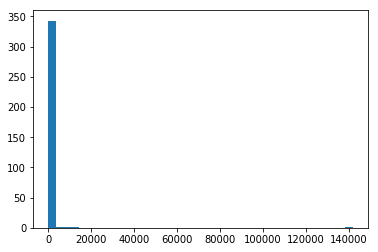

In [34]:
# now let's get down to business:
plt.hist(dffix['Property Crime'], bins=40, histtype='stepfilled')
plt.show()

In [35]:
dfcheck = dffix[dffix['Property Crime'] > 25000]
dfcheck # goddamn New York! Lower your property crime!

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson,Population,Population Squared,Propertybool,Murder/Manslaughterbool,Robberybool,Murderper10k,Murderlogfxn,LogMurder
216,New York,"52,384",335,"1,112","19,170","31,767",141971,"16,606","117,931","7,434",0,8396126,70494931807876,1,1,1,0.399,21.012,0.069


In [36]:
# for consistency purposes, going to do the same transformation that I did to 
# the murder rate for New York

dffix['LogProp'] = (np.log(dffix['Property Crime']) / dffix['Population'])


c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
dffix['LogProp'] *= 100000 # scaling values back to something useful

# ***AGAIN*** do ***NOT*** run this more than once or else you will do
# ANOTHER multiplication!

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
dffix['LogProp'] = [0 if x == float('-inf') else x 
                      for x in dffix['LogProp']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
dffix.LogProp

0     133.525
1     123.324
2      97.421
3       8.490
4      84.646
5      93.633
6     129.286
7       6.474
8      56.173
9      33.021
10    178.449
11     77.305
12    105.342
13     63.816
14     24.774
15     96.576
16     59.914
17     83.856
18     41.148
19     91.615
20     28.648
21     17.788
22     16.763
23    187.167
24     38.289
25    135.645
26    136.690
27    145.849
28    166.295
29    108.776
        ...  
318   121.330
319     0.000
320    49.856
321    12.702
322    22.685
323    71.959
324    23.774
325   140.090
326   126.172
327    69.671
328    48.588
329   101.794
330    25.056
331    53.577
332   242.846
333    91.976
334    14.050
335   179.125
336   111.497
337   218.487
338    15.167
339   158.492
340    12.364
341    95.996
342    47.520
343    58.900
344   341.763
345    68.461
346     3.902
347    15.859
Name: LogProp, Length: 348, dtype: float64

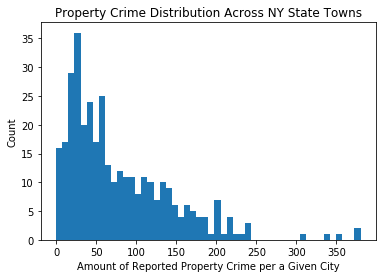

In [40]:
plt.hist(dffix['LogProp'], bins=50)
plt.title('Property Crime Distribution Across NY State Towns')
plt.ylabel('Count')
plt.xlabel('Amount of Reported Property Crime per a Given City')
plt.show()

In [41]:
# good thing I did that distribution "out of curiosity" - that would've been a problem otherwise

# now: check to make sure all other numerical values are type(float) - then perform heatmap correlation analysis
print('The data type of column {} is {}'.format('Rape', type(dffix.Rape[5])))
print('\nThe data type of column {} is {}'.format('Robbery', type(dffix.Robbery[5])))
print('\nThe data type of column {} is {}'.format('Larceny/Theft', type(dffix['Larceny/Theft'][5])))
print('\nThe data type of column {} is {}'.format('Arson', type(dffix.Arson[5])))
print('\nThe data type of column {} is {}'.format('Aggravated Assault', type(dffix['Aggravated Assault'][5])))
print('\nThe data type of column {} is {}'.format('Motor Vehicle Theft', type(dffix['Motor Vehicle Theft'][5])))

The data type of column Rape is <class 'str'>

The data type of column Robbery is <class 'str'>

The data type of column Larceny/Theft is <class 'str'>

The data type of column Arson is <class 'numpy.int64'>

The data type of column Aggravated Assault is <class 'str'>

The data type of column Motor Vehicle Theft is <class 'str'>


In [42]:
# welp, got my work cut out for me...
dffix['Rape'] = dffix['Rape'].str.replace(',','')
dffix['Rape'] = [int(i) for i in dffix['Rape']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
dffix['Robbery'] = dffix['Robbery'].str.replace(',','')
dffix['Robbery'] = [int(i) for i in dffix['Robbery']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
dffix['Larceny/Theft'] = dffix['Larceny/Theft'].str.replace(',','')
dffix['Larceny/Theft'] = [int(i) for i in dffix['Larceny/Theft']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
# ignoring the annoying warning.
pd.options.mode.chained_assignment = None  # default='warn'

In [46]:
dffix['Aggravated Assault'] = dffix['Aggravated Assault'].str.replace(',','')
dffix['Aggravated Assault'] = [int(i) for i in dffix['Aggravated Assault']]

In [47]:
dffix['Motor Vehicle Theft'] = dffix['Motor Vehicle Theft'].str.replace(',','')
dffix['Motor Vehicle Theft'] = [int(i) for i in dffix['Motor Vehicle Theft']]

In [48]:
# check again for completed clean-up
print('The data type of column {} is {}'.format('Rape', type(dffix.Rape[5])))
print('\nThe data type of column {} is {}'.format('Robbery', type(dffix.Robbery[5])))
print('\nThe data type of column {} is {}'.format('Larceny/Theft', type(dffix['Larceny/Theft'][5])))
print('\nThe data type of column {} is {}'.format('Arson', type(dffix.Arson[5])))
print('\nThe data type of column {} is {}'.format('Aggravated Assault', type(dffix['Aggravated Assault'][5])))
print('\nThe data type of column {} is {}'.format('Motor Vehicle Theft', type(dffix['Motor Vehicle Theft'][5])))

The data type of column Rape is <class 'numpy.int64'>

The data type of column Robbery is <class 'numpy.int64'>

The data type of column Larceny/Theft is <class 'numpy.int64'>

The data type of column Arson is <class 'numpy.int64'>

The data type of column Aggravated Assault is <class 'numpy.int64'>

The data type of column Motor Vehicle Theft is <class 'numpy.int64'>


In [49]:
dffix = dffix.sort_values(by='Property Crime', ascending=False)
dffix.head()

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,Arson,Population,Population Squared,Propertybool,Murder/Manslaughterbool,Robberybool,Murderper10k,Murderlogfxn,LogMurder,LogProp
216,New York,"52,384",335,1112,19170,31767,141971,"16,606",117931,7434,0,8396126,70494931807876,1,1,1,0.399,21.012,0.069,0.141
35,Buffalo,"3,249",47,145,1322,1735,12491,"3,458",8076,957,0,258789,66971746521,1,1,1,1.816,3.771,1.488,3.645
272,Rochester,"2,107",42,92,918,1055,10051,"2,587",6855,609,132,210562,44336355844,1,1,1,1.995,3.426,1.775,4.377
310,Syracuse,"1,192",21,75,400,696,6473,"1,781",4298,394,57,143834,20688219556,1,1,1,1.460,1.768,2.117,6.101
3,Albany,791,8,30,227,526,4090,705,3243,142,0,97956,9595377936,1,1,1,0.817,0.696,2.123,8.490


c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: Runtim

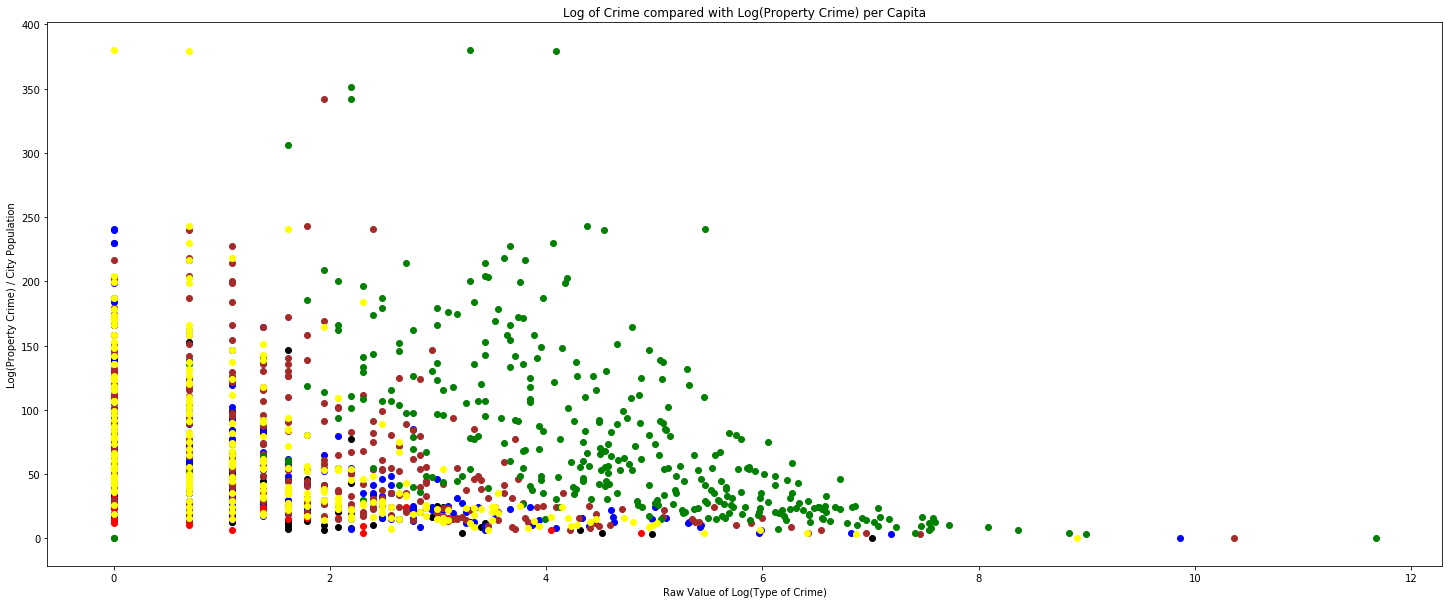

In [50]:
# and now for a quick scatter check before delving into a heatmap corr plot
plt.figure(figsize=(25,10))
plt.scatter(x=np.log(dffix['Rape']), y=dffix['LogProp'], color='black')
plt.scatter(x=np.log(dffix['Robbery']), y=dffix['LogProp'], color='blue')
plt.scatter(x=np.log(dffix['Arson']), y=dffix['LogProp'], color='red')
plt.scatter(x=np.log(dffix['Aggravated Assault']), y=dffix['LogProp'], color='brown')
plt.scatter(x=np.log(dffix['Larceny/Theft']), y=dffix['LogProp'], color='green')
plt.scatter(x=np.log(dffix['Motor Vehicle Theft']), y=dffix['LogProp'], color='yellow')

plt.title('Log of Crime compared with Log(Property Crime) per Capita')
plt.ylabel('Log(Property Crime) / City Population')
plt.xlabel('Raw Value of Log(Type of Crime)')
plt.show()

In [51]:
# so it seems silly to have the dependent variable be on a per capita basis and the crimes not 
# (although logmurder currently exists)

# create per capita versions for each of the crimes, then let's do a corr/heatmap analysis
# columns to be transformed::: arson, ag assault, mv theft, larceny/theft, robbery, rape

# going to use the below as a template for the transformation:

dffix['LogArson'] = (np.log(dffix['Arson']) / dffix['Population'])
dffix['LogArson'] *= 100000
dffix['LogArson'] = [0 if x == float('-inf') else x for x in dffix['LogArson']]


c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [52]:
dffix['LogAgAssault'] = (np.log(dffix['Aggravated Assault']) / dffix['Population'])
dffix['LogAgAssault'] *= 100000
dffix['LogAgAssault'] = [0 if x == float('-inf') else x for x in dffix['LogAgAssault']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [53]:
dffix['LogMotorVehicleTheft'] = (np.log(dffix['Motor Vehicle Theft']) / dffix['Population'])
dffix['LogMotorVehicleTheft'] *= 100000
dffix['LogMotorVehicleTheft'] = [0 if x == float('-inf') else x for x in dffix['LogMotorVehicleTheft']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [54]:
dffix['LogLarceny'] = (np.log(dffix['Larceny/Theft']) / dffix['Population'])
dffix['LogLarceny'] *= 100000
dffix['LogLarceny'] = [0 if x == float('-inf') else x for x in dffix['LogLarceny']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [55]:
dffix['LogRobbery'] = (np.log(dffix['Robbery']) / dffix['Population'])
dffix['LogRobbery'] *= 100000
dffix['LogRobbery'] = [0 if x == float('-inf') else x for x in dffix['LogRobbery']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [56]:
dffix['LogRape'] = (np.log(dffix['Rape']) / dffix['Population'])
dffix['LogRape'] *= 100000
dffix['LogRape'] = [0 if x == float('-inf') else x for x in dffix['LogRape']]

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


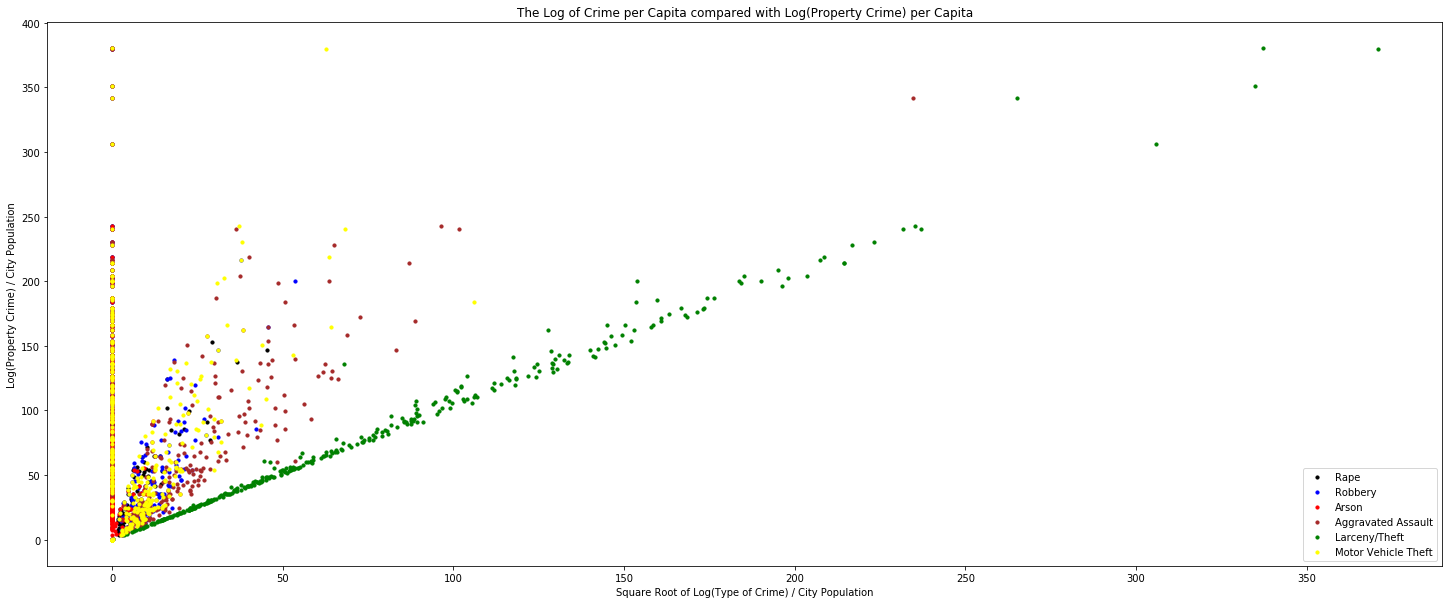

In [57]:
# now for the main event

plt.figure(figsize=(25,10))
plt.scatter(x=dffix['LogRape'], y=dffix['LogProp'], color='black', s=10)
plt.scatter(x=dffix['LogRobbery'], y=dffix['LogProp'], color='blue', s=10)
plt.scatter(x=dffix['LogArson'], y=dffix['LogProp'], color='red', s=10)
plt.scatter(x=dffix['LogAgAssault'], y=dffix['LogProp'], color='brown', s=10)
plt.scatter(x=dffix['LogLarceny'], y=dffix['LogProp'], color='green', s=10)
plt.scatter(x=dffix['LogMotorVehicleTheft'], y=dffix['LogProp'], color='yellow', s=10)

plt.legend(['Rape', 'Robbery', 'Arson', 'Aggravated Assault', 'Larceny/Theft', 'Motor Vehicle Theft'])

plt.title('The Log of Crime per Capita compared with Log(Property Crime) per Capita')
plt.ylabel('Log(Property Crime) / City Population')
plt.xlabel('Square Root of Log(Type of Crime) / City Population')
#plt.xlim(0, 50)
plt.show()

In [58]:
# Problems:
# 1. Values of zero are being coupled with Property crime because of another value. 
# That creates that odd and useless vertical line. Need to create multiple ***dataframes*** with LogCrime values > 0
# If put on the same dataframe, it will say that the indexes don't match up and throw an error. Can't have that.


# This is how I deal with LogCrime values > 0
dfrobbery = dffix[dffix['Robberybool'] == 1].reset_index()


In [59]:
dfmurder = dffix[dffix['Murder/Manslaughterbool'] == 1].reset_index()

In [60]:
# gotta do the following: rape, arson, ag assault, larceny, mvt

dffix['Rapebool'] = [0 if i == 0 else 1 for i in dffix['Rape']]
dfrape = dffix[dffix['Rapebool'] == 1].reset_index()

In [61]:
dffix['Arsonbool'] = [0 if i == 0 else 1 for i in dffix['Arson']]
dfarson = dffix[dffix['Arsonbool'] == 1].reset_index()

In [62]:
dffix['AgAssaultbool'] = [0 if i == 0 else 1 for i in dffix['Aggravated Assault']]
dfagassault = dffix[dffix['AgAssaultbool'] == 1].reset_index()

In [63]:
dffix['Larcenybool'] = [0 if i == 0 else 1 for i in dffix['Larceny/Theft']]
dflarceny = dffix[dffix['Larcenybool'] == 1].reset_index()

In [64]:
dffix['Motortheftbool'] = [0 if i == 0 else 1 for i in dffix['Motor Vehicle Theft']]
dfmvt = dffix[dffix['Motortheftbool'] == 1].reset_index()

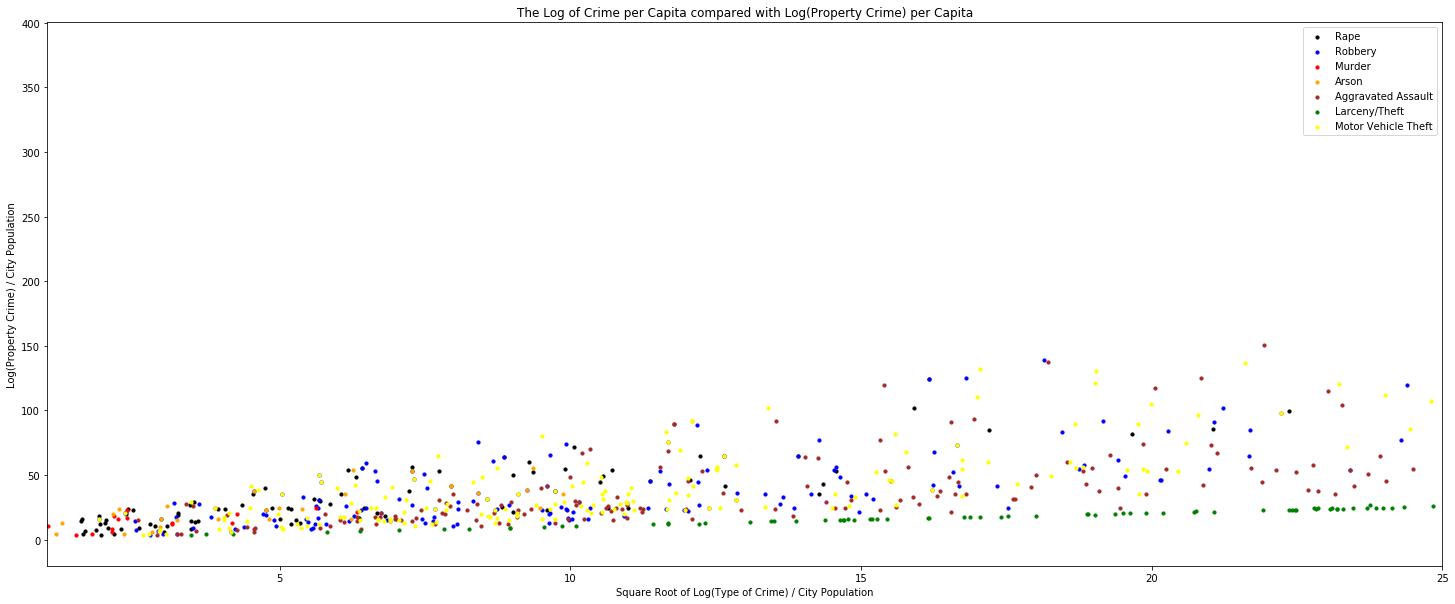

In [65]:
# have to do the different df's as they may be different lengths

plt.figure(figsize=(25,10))
plt.scatter(x=dfrape['LogRape'], y=dfrape['LogProp'], color='black', s=10)
plt.scatter(x=dfrobbery['LogRobbery'], y=dfrobbery['LogProp'], color='blue', s=10)
plt.scatter(x=dfmurder['LogMurder'], y=dfmurder['LogProp'], color='red', s=10)
plt.scatter(x=dfarson['LogArson'], y=dfarson['LogProp'], color='orange', s=10)
plt.scatter(x=dfagassault['LogAgAssault'], y=dfagassault['LogProp'], color='brown', s=10)
plt.scatter(x=dflarceny['LogLarceny'], y=dflarceny['LogProp'], color='green', s=10)
plt.scatter(x=dfmvt['LogMotorVehicleTheft'], y=dfmvt['LogProp'], color='yellow', s=10)

plt.legend(['Rape', 'Robbery', 'Murder', 'Arson', 'Aggravated Assault', 'Larceny/Theft', 'Motor Vehicle Theft'])

plt.title('The Log of Crime per Capita compared with Log(Property Crime) per Capita')
plt.ylabel('Log(Property Crime) / City Population')
plt.xlabel('Square Root of Log(Type of Crime) / City Population')
plt.xlim(1, 25)
plt.show()

In [66]:
# The real problem: log(1) = 0. Does that affect my data? ASK MENTOR!
# Also ask about the effect of only using positive values (i.e., finding correlation where a bool ONLY == 1, 
# and therefore not incorporating data where is an absence of a specific crime in a dataset)

# overall, it seems that the log's worked - the independent variables are linear...

In [67]:
dfcorr = dffix[['LogRape', 'LogRobbery', 'LogMurder', 'LogArson', 'LogAgAssault', 'LogLarceny', 
                'LogMotorVehicleTheft', 'LogProp']].copy()
corr = dfcorr.corr()
corr

,LogRape,LogRobbery,LogMurder,LogArson,LogAgAssault,LogLarceny,LogMotorVehicleTheft,LogProp
LogRape,1.000,0.325,0.101,0.086,0.176,-0.089,0.101,-0.096
LogRobbery,0.325,1.000,0.118,0.163,0.128,-0.145,0.212,-0.154
LogMurder,0.101,0.118,1.000,0.184,-0.057,-0.186,-0.010,-0.185
LogArson,0.086,0.163,0.184,1.000,0.003,-0.142,0.061,-0.145
LogAgAssault,0.176,0.128,-0.057,0.003,1.000,0.332,0.231,0.351
LogLarceny,-0.089,-0.145,-0.186,-0.142,0.332,1.000,0.198,0.995
LogMotorVehicleTheft,0.101,0.212,-0.010,0.061,0.231,0.198,1.000,0.193
LogProp,-0.096,-0.154,-0.185,-0.145,0.351,0.995,0.193,1.000


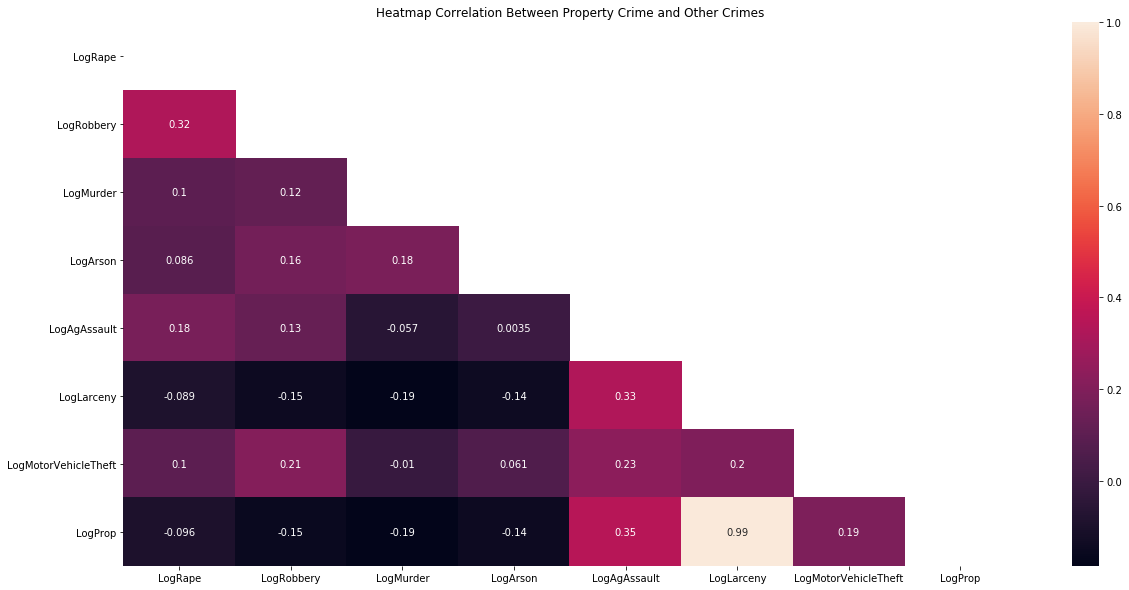

In [68]:
import seaborn as sns
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,10))
ax = sns.heatmap(corr, mask=mask, xticklabels=dfcorr.columns, yticklabels=dfcorr.columns, annot=True)

plt.title('Heatmap Correlation Between Property Crime and Other Crimes')

plt.show()

In [69]:
# Not really the things I had in mind, so back to the drawing board...
# maybe try population ^2?
dffix['LogRape2'] = (dffix['LogRape'] / dffix['Population']) 

# ^^^easier to type out than defining whole new variable that includes dffix['PopulationSquared']

dffix['LogRobbery2'] = (dffix['LogRobbery'] / dffix['Population'])
dffix['LogMurder2'] = (dffix['LogMurder'] / dffix['Population'])
dffix['LogArson2'] = (dffix['LogArson'] / dffix['Population'])
dffix['LogAgAssault2'] = (dffix['LogAgAssault'] / dffix['Population'])
dffix['LogMotorVehicleTheft2'] = (dffix['LogMotorVehicleTheft'] / dffix['Population']) 
dffix['LogLarceny2'] = (dffix['LogLarceny'] / dffix['Population']) 
# even though this ^^^ was already good, I want to experiment with it, not to mention for consistency purposes

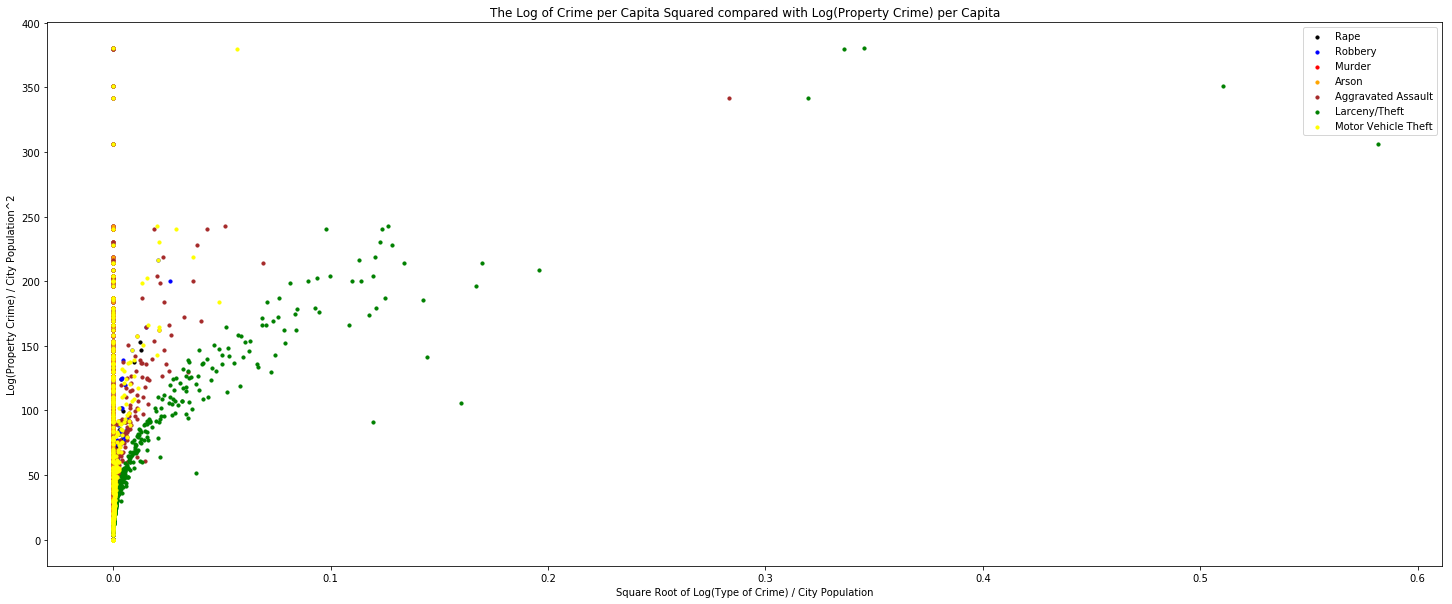

In [70]:
plt.figure(figsize=(25,10))
plt.scatter(x=dffix['LogRape2'], y=dffix['LogProp'], color='black', s=10)
plt.scatter(x=dffix['LogRobbery2'], y=dffix['LogProp'], color='blue', s=10)
plt.scatter(x=dffix['LogMurder2'], y=dffix['LogProp'], color='red', s=10)
plt.scatter(x=dffix['LogArson2'], y=dffix['LogProp'], color='orange', s=10)
plt.scatter(x=dffix['LogAgAssault2'], y=dffix['LogProp'], color='brown', s=10)
plt.scatter(x=dffix['LogLarceny2'], y=dffix['LogProp'], color='green', s=10)
plt.scatter(x=dffix['LogMotorVehicleTheft2'], y=dffix['LogProp'], color='yellow', s=10)

plt.legend(['Rape', 'Robbery', 'Murder', 'Arson', 'Aggravated Assault', 'Larceny/Theft', 'Motor Vehicle Theft'])

plt.title('The Log of Crime per Capita Squared compared with Log(Property Crime) per Capita')
plt.ylabel('Log(Property Crime) / City Population^2')
plt.xlabel('Square Root of Log(Type of Crime) / City Population')
#plt.xlim(1, 25)
plt.show()

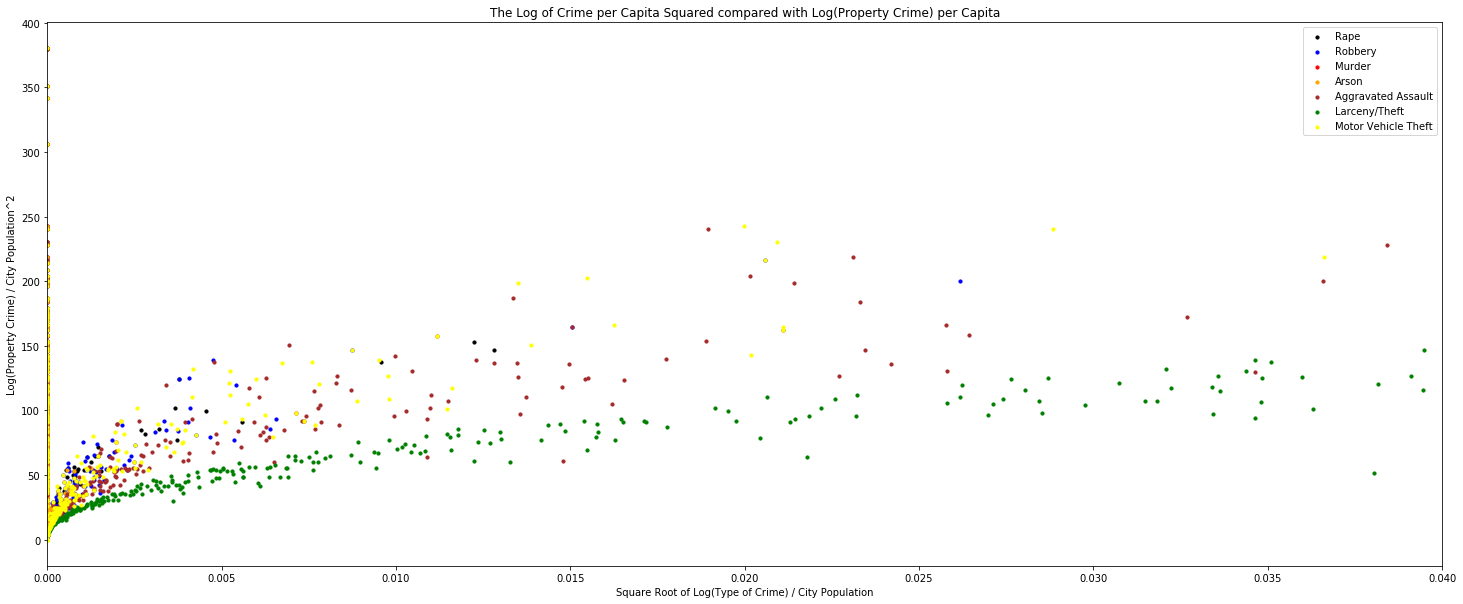

In [71]:
plt.figure(figsize=(25,10))
plt.scatter(x=dffix['LogRape2'], y=dffix['LogProp'], color='black', s=10)
plt.scatter(x=dffix['LogRobbery2'], y=dffix['LogProp'], color='blue', s=10)
plt.scatter(x=dffix['LogMurder2'], y=dffix['LogProp'], color='red', s=10)
plt.scatter(x=dffix['LogArson2'], y=dffix['LogProp'], color='orange', s=10)
plt.scatter(x=dffix['LogAgAssault2'], y=dffix['LogProp'], color='brown', s=10)
plt.scatter(x=dffix['LogLarceny2'], y=dffix['LogProp'], color='green', s=10)
plt.scatter(x=dffix['LogMotorVehicleTheft2'], y=dffix['LogProp'], color='yellow', s=10)

plt.legend(['Rape', 'Robbery', 'Murder', 'Arson', 'Aggravated Assault', 'Larceny/Theft', 'Motor Vehicle Theft'])

plt.title('The Log of Crime per Capita Squared compared with Log(Property Crime) per Capita')
plt.ylabel('Log(Property Crime) / City Population^2')
plt.xlabel('Square Root of Log(Type of Crime) / City Population')
plt.xlim(0,0.04)
plt.show()

In [72]:
dffix['LogProp2'] = dffix['LogProp'] / dffix['Population']

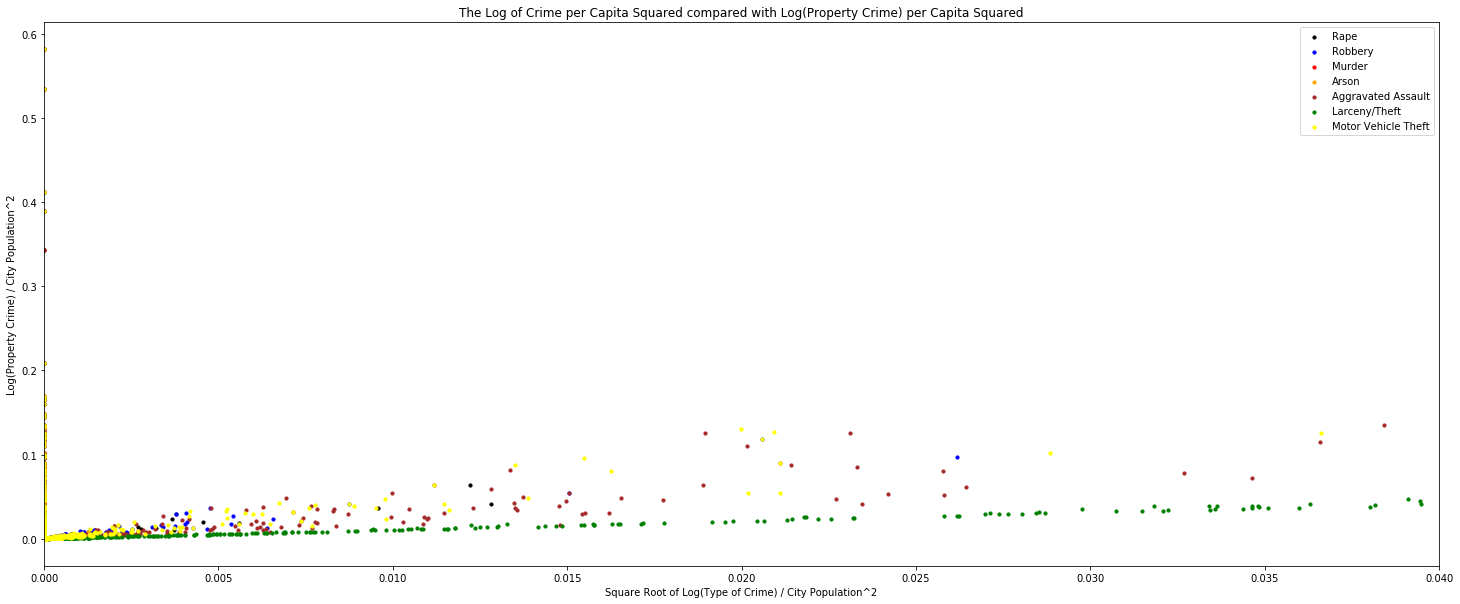

In [73]:
plt.figure(figsize=(25,10))

plt.scatter(x=dffix['LogRape2'], y=dffix['LogProp2'], color='black', s=10)
plt.scatter(x=dffix['LogRobbery2'], y=dffix['LogProp2'], color='blue', s=10)
plt.scatter(x=dffix['LogMurder2'], y=dffix['LogProp2'], color='red', s=10)
plt.scatter(x=dffix['LogArson2'], y=dffix['LogProp2'], color='orange', s=10)
plt.scatter(x=dffix['LogAgAssault2'], y=dffix['LogProp2'], color='brown', s=10)
plt.scatter(x=dffix['LogLarceny2'], y=dffix['LogProp2'], color='green', s=10)
plt.scatter(x=dffix['LogMotorVehicleTheft2'], y=dffix['LogProp2'], color='yellow', s=10)

plt.legend(['Rape', 'Robbery', 'Murder', 'Arson', 'Aggravated Assault', 'Larceny/Theft', 'Motor Vehicle Theft'])

plt.title('The Log of Crime per Capita Squared compared with Log(Property Crime) per Capita Squared')
plt.ylabel('Log(Property Crime) / City Population^2')
plt.xlabel('Square Root of Log(Type of Crime) / City Population^2')
plt.xlim(0,0.04)
plt.show()

In [74]:
dfcorr2 = dffix[['LogRape2', 'LogRobbery2', 'LogMurder2', 'LogArson2', 'LogAgAssault2', 'LogLarceny2', 
                'LogMotorVehicleTheft2', 'LogProp2']].copy()
corr2 = dfcorr2.corr()
corr2

,LogRape2,LogRobbery2,LogMurder2,LogArson2,LogAgAssault2,LogLarceny2,LogMotorVehicleTheft2,LogProp2
LogRape2,1.000,0.139,-0.013,0.007,0.029,-0.026,0.031,-0.028
LogRobbery2,0.139,1.000,-0.021,0.057,0.002,0.019,0.146,0.017
LogMurder2,-0.013,-0.021,1.000,0.043,-0.041,-0.076,-0.046,-0.076
LogArson2,0.007,0.057,0.043,1.000,-0.022,-0.067,-0.010,-0.068
LogAgAssault2,0.029,0.002,-0.041,-0.022,1.000,0.333,0.128,0.382
LogLarceny2,-0.026,0.019,-0.076,-0.067,0.333,1.000,0.263,0.995
LogMotorVehicleTheft2,0.031,0.146,-0.046,-0.010,0.128,0.263,1.000,0.257
LogProp2,-0.028,0.017,-0.076,-0.068,0.382,0.995,0.257,1.000


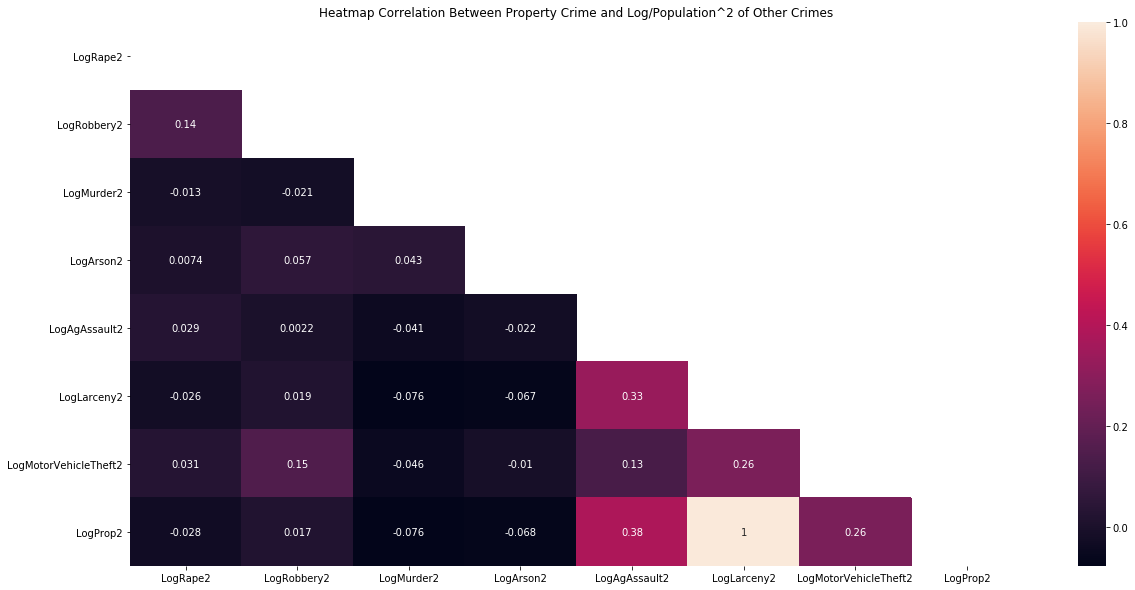

In [75]:
mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,10))
ax = sns.heatmap(corr2, mask=mask, xticklabels=dfcorr2.columns, yticklabels=dfcorr2.columns, annot=True)

plt.title('Heatmap Correlation Between Property Crime and Log/Population^2 of Other Crimes')

plt.show()

The above graph shows that doing a function of log(crime) / City Population^2 increased the correlation between Property Crime and Motor Vehicle Theft and mildly increased the correlation between PC and Aggravated Assault...but not enough to make a difference.

I want to do one final change before calling it and jumping into the regression: fixing the log values.

As of now, if LogCrime = -inf, I arbitrarily set it to 0
Crimes that occur once in a city are also set to 0 (log(1) = 0). This makes the data confusing. Therefore, I am now (arbitrarily) setting the numerator for Crimes of 1 to be log(2) * 0.5...just to make things spicy.

### _Actually_...

when looking at the bottom row of the heatmap, we see that all values (mildly) increase between correlation of property crime and given crime.

I lied - I'm not going to re do a third thing that involves a function of modified population and PC. I'm just going to fix the zero values as stated before and work from there.

In [76]:
dfcheck = dffix.sort_values(by=('LogProp'))
dfcheck

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,...,Larcenybool,Motortheftbool,LogRape2,LogRobbery2,LogMurder2,LogArson2,LogAgAssault2,LogMotorVehicleTheft2,LogLarceny2,LogProp2
287,Schoharie Village,0,0,0,0,0,0,0,0,0,...,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
319,Tuxedo Park Village,0,0,0,0,0,0,0,0,0,...,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
208,New Berlin Town,0,0,0,0,0,0,0,0,0,...,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
295,Shortsville Village,0,0,0,0,0,0,0,0,0,...,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
186,Manchester Village,0,0,0,0,0,0,0,0,0,...,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
128,Greene Village,0,0,0,0,0,1,1,0,0,...,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
95,Elmira Town,0,0,0,0,0,1,0,1,0,...,1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
227,Northville Village,0,0,0,0,0,1,0,1,0,...,1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
256,Port Byron Village,0,0,0,0,0,0,0,0,0,...,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
216,New York,"52,384",335,1112,19170,31767,141971,"16,606",117931,7434,...,1,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [77]:
dffix['LogProp2']

216   0.000
35    0.000
272   0.000
310   0.000
3     0.000
218   0.000
285   0.000
53    0.000
321   0.000
346   0.000
22    0.000
126   0.000
7     0.000
62    0.000
315   0.000
57    0.000
206   0.000
214   0.000
210   0.001
152   0.000
263   0.000
340   0.000
134   0.000
330   0.001
154   0.001
314   0.000
112   0.001
209   0.001
93    0.001
301   0.000
       ... 
252   0.041
149   0.122
30    0.004
34    0.167
6     0.073
297   0.038
136   0.535
238   0.120
201   0.017
116   0.059
46    0.017
260   0.209
77    0.165
221   0.068
13    0.025
118   0.582
48    0.144
25    0.133
44    0.119
157   0.038
12    0.160
227   0.000
95    0.000
128   0.000
186   0.000
295   0.000
208   0.000
319   0.000
256   0.000
287   0.000
Name: LogProp2, Length: 348, dtype: float64

In [78]:
dffix['LogProp2'] = [(0.5 * np.log(2) / y ** 2) if x == 1 else x for x, y in zip(dffix['LogProp2'], dffix['Population'])]

In [79]:
dffix['LogRape2'] = [(0.5 * np.log(2) / y ** 2) if x == 1 else x for x, y in zip(dffix['LogRape2'], dffix['Population'])]

In [80]:
# rest to do: rape, robbery, murder, arson, agassault, larceny(1, not 2), mvt


dffix['LogRobbery2'] = [(0.5 * np.log(2) / y ** 2) if x == 1 else x for x, y in zip(dffix['LogRobbery2'], dffix['Population'])]
dffix['LogMurder2'] = [(0.5 * np.log(2) / y ** 2) if x == 1 else x for x, y in zip(dffix['LogMurder2'], dffix['Population'])]
dffix['LogArson2'] = [(0.5 * np.log(2) / y ** 2) if x == 1 else x for x, y in zip(dffix['LogArson2'], dffix['Population'])]
dffix['LogAgAssault2'] = [(0.5 * np.log(2) / y ** 2) if x == 1 else x for x, y in zip(dffix['LogAgAssault2'], dffix['Population'])]
dffix['LogLarceny'] = [(0.5 * np.log(2) / y) if x == 1 else x for x, y in zip(dffix['LogLarceny'], dffix['Population'])]
dffix['LogMotorVehicleTheft2'] = [(0.5 * np.log(2) / y ** 2) if x == 1 
                                  else x for x, y in zip(dffix['LogMotorVehicleTheft2'], dffix['Population'])]

In [81]:
# accidentally did "if x == 0" for the above - meaning I over-wrote the dataseries's
# Time to fix
dffix['LogArson2'] = [0 if x == float('-inf') else x for x in dffix['LogArson2']]
dffix['LogRobbery2'] = [0 if x == float('-inf') else x for x in dffix['LogRobbery2']]
dffix['LogMurder2'] = [0 if x == float('-inf') else x for x in dffix['LogMurder2']]
dffix['LogAgAssault2'] = [0 if x == float('-inf') else x for x in dffix['LogAgAssault2']]
dffix['LogLarceny'] = [0 if x == float('-inf') else x for x in dffix['LogLarceny']]
dffix['LogMotorVehicleTheft2'] = [0 if x == float('-inf') else x for x in dffix['LogMotorVehicleTheft2']]
dffix['LogProp2'] = [0 if x == float('-inf') else x for x in dffix['LogProp2']]


In [82]:
# sure fine I'll throw in larceny2 too
dffix['LogLarceny2'] = [0 if x == float('-inf') else x for x in dffix['LogLarceny2']]
dffix['LogLarceny2'] = [(0.5 * np.log(2) / y ** 2) if x == 1 else x for x, y in zip(dffix['LogLarceny2'], dffix['Population'])]

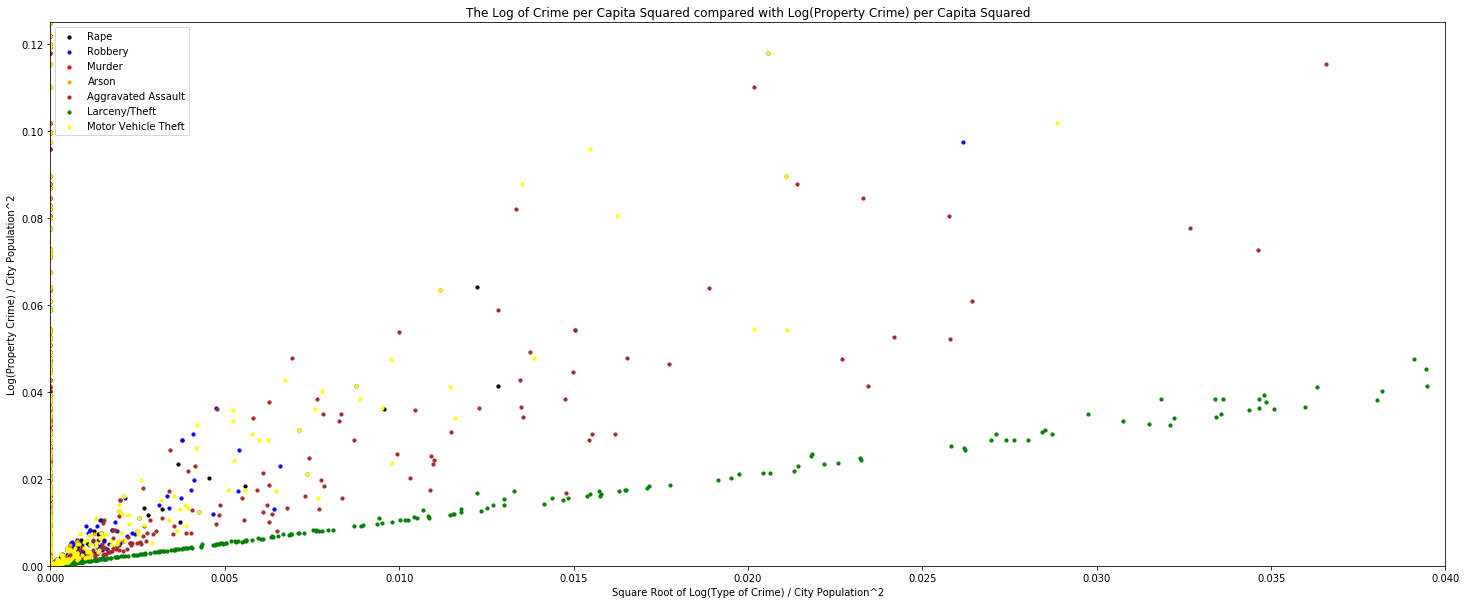

In [83]:
# doing this one more time!
plt.figure(figsize=(25,10))

plt.scatter(x=dffix['LogRape2'], y=dffix['LogProp2'], color='black', s=10)
plt.scatter(x=dffix['LogRobbery2'], y=dffix['LogProp2'], color='blue', s=10)
plt.scatter(x=dffix['LogMurder2'], y=dffix['LogProp2'], color='red', s=10)
plt.scatter(x=dffix['LogArson2'], y=dffix['LogProp2'], color='orange', s=10)
plt.scatter(x=dffix['LogAgAssault2'], y=dffix['LogProp2'], color='brown', s=10)
plt.scatter(x=dffix['LogLarceny2'], y=dffix['LogProp2'], color='green', s=10)
plt.scatter(x=dffix['LogMotorVehicleTheft2'], y=dffix['LogProp2'], color='yellow', s=10)

plt.legend(['Rape', 'Robbery', 'Murder', 'Arson', 'Aggravated Assault', 'Larceny/Theft', 'Motor Vehicle Theft'])

plt.title('The Log of Crime per Capita Squared compared with Log(Property Crime) per Capita Squared')
plt.ylabel('Log(Property Crime) / City Population^2')
plt.xlabel('Square Root of Log(Type of Crime) / City Population^2')
plt.ylim(0, 0.125)
plt.xlim(0, 0.04)
plt.show()

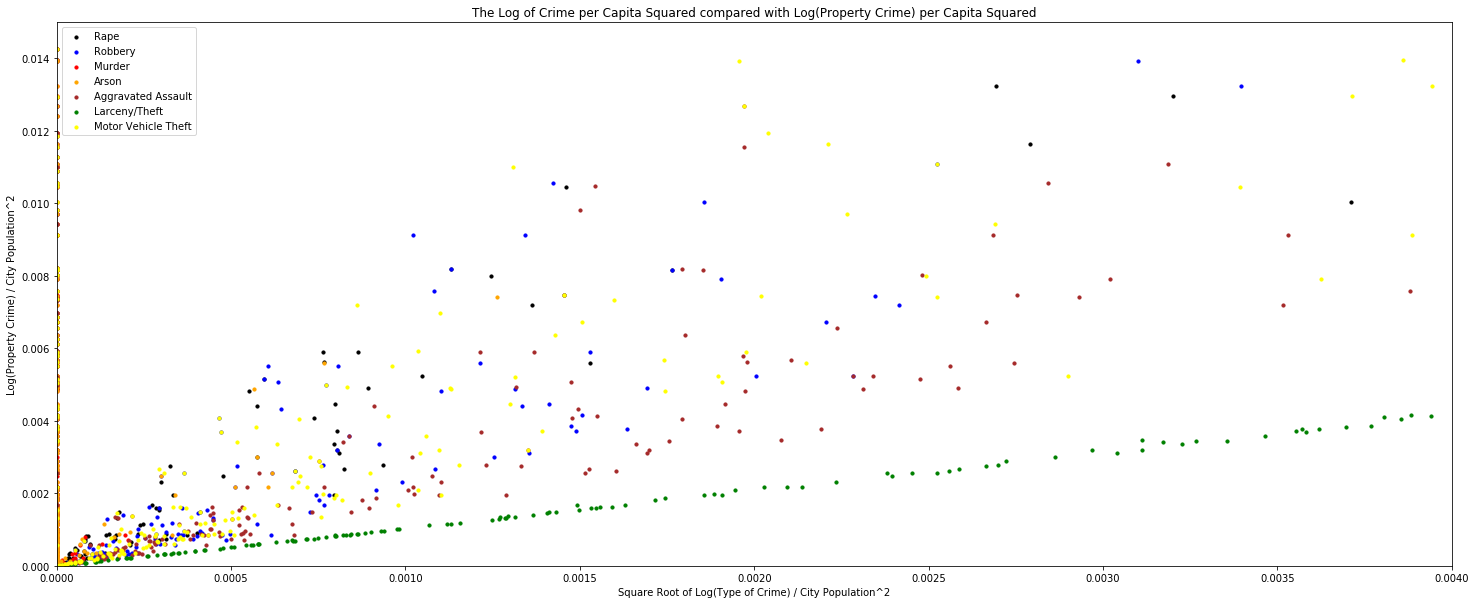

In [84]:
# doing it again but super zoomed in on the beginning stuff
# doing this one more time!
plt.figure(figsize=(25,10))

plt.scatter(x=dffix['LogRape2'], y=dffix['LogProp2'], color='black', s=10)
plt.scatter(x=dffix['LogRobbery2'], y=dffix['LogProp2'], color='blue', s=10)
plt.scatter(x=dffix['LogMurder2'], y=dffix['LogProp2'], color='red', s=10)
plt.scatter(x=dffix['LogArson2'], y=dffix['LogProp2'], color='orange', s=10)
plt.scatter(x=dffix['LogAgAssault2'], y=dffix['LogProp2'], color='brown', s=10)
plt.scatter(x=dffix['LogLarceny2'], y=dffix['LogProp2'], color='green', s=10)
plt.scatter(x=dffix['LogMotorVehicleTheft2'], y=dffix['LogProp2'], color='yellow', s=10)

plt.legend(['Rape', 'Robbery', 'Murder', 'Arson', 'Aggravated Assault', 'Larceny/Theft', 'Motor Vehicle Theft'])

plt.title('The Log of Crime per Capita Squared compared with Log(Property Crime) per Capita Squared')
plt.ylabel('Log(Property Crime) / City Population^2')
plt.xlabel('Square Root of Log(Type of Crime) / City Population^2')
plt.ylim(0, 0.015)
plt.xlim(0, 0.004)
plt.show()

In [85]:
dfcorr3 = dffix[['LogRape2', 'LogRobbery2', 'LogMurder2', 'LogArson2', 'LogAgAssault2', 'LogLarceny2', 
                'LogMotorVehicleTheft2', 'LogProp2']].copy()
corr3 = dfcorr3.corr()
corr3

,LogRape2,LogRobbery2,LogMurder2,LogArson2,LogAgAssault2,LogLarceny2,LogMotorVehicleTheft2,LogProp2
LogRape2,1.000,0.139,-0.013,0.007,0.029,-0.026,0.031,-0.028
LogRobbery2,0.139,1.000,-0.021,0.057,0.002,0.019,0.146,0.017
LogMurder2,-0.013,-0.021,1.000,0.043,-0.041,-0.076,-0.046,-0.076
LogArson2,0.007,0.057,0.043,1.000,-0.022,-0.067,-0.010,-0.068
LogAgAssault2,0.029,0.002,-0.041,-0.022,1.000,0.333,0.128,0.382
LogLarceny2,-0.026,0.019,-0.076,-0.067,0.333,1.000,0.263,0.995
LogMotorVehicleTheft2,0.031,0.146,-0.046,-0.010,0.128,0.263,1.000,0.257
LogProp2,-0.028,0.017,-0.076,-0.068,0.382,0.995,0.257,1.000


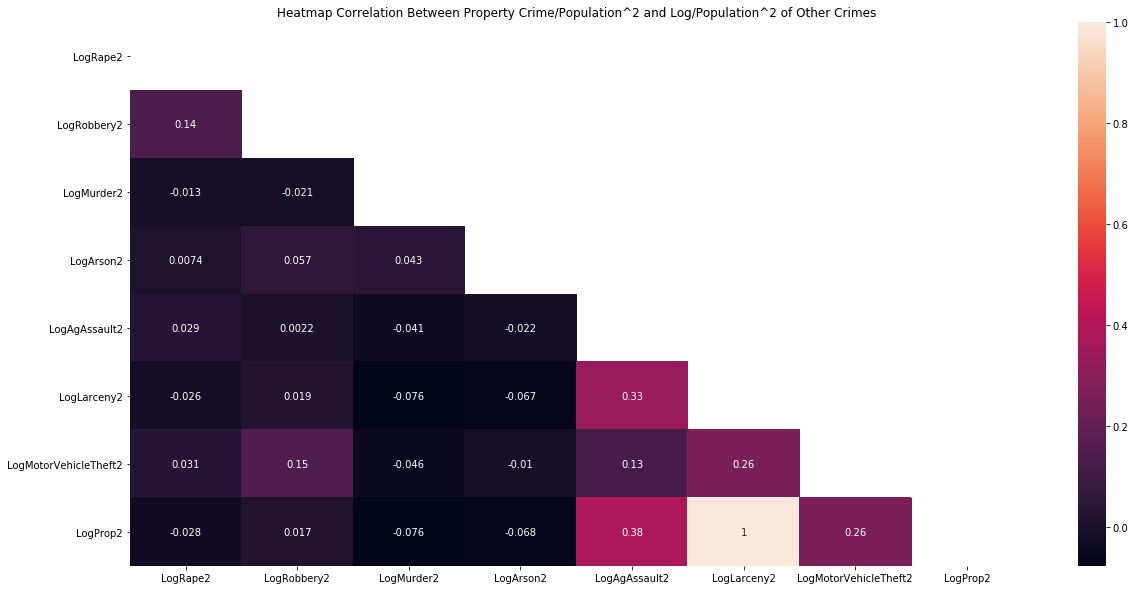

In [86]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr3, mask=mask, xticklabels=dfcorr2.columns, yticklabels=dfcorr2.columns, annot=True)

plt.title('Heatmap Correlation Between Property Crime/Population^2 and Log/Population^2 of Other Crimes')

plt.show()

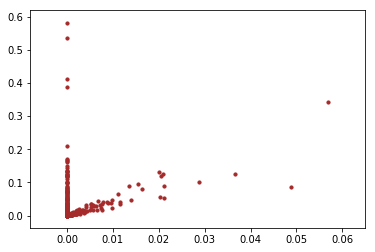

In [87]:
# I can't stop transforming! I'm a transforming fiend!
# rooting blue black brown yellow to decrease variance
# plt.scatter(x=dffix['LogAgAssault2'], y=dffix['LogProp2'], color='brown', s=10)
#plt.scatter(x=dffix['LogRobbery2'], y=dffix['LogProp2'], color='brown', s=10)
plt.scatter(x=dffix['LogMotorVehicleTheft2'], y=dffix['LogProp2'], color='brown', s=10)
#plt.xlim(0,0.01)
#plt.ylim(0, 0.05)
plt.show()

In [88]:
dffix['LogMVTandRob2'] = [(x + y) / 2 for x, y in zip (dffix['LogMotorVehicleTheft2'], dffix['LogRobbery2'])]

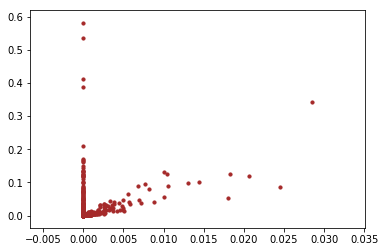

In [89]:
plt.scatter(x=dffix['LogMVTandRob2'], y=dffix['LogProp2'], color='brown', s=10)
#plt.xlim(0,0.01)
#plt.ylim(0, 0.05)
plt.show()

In [90]:
# maybe it's the zero values...maybe
dffix['LogMotorVehicleTheft2'].value_counts()
# welp this doesn't help me because of I'm only seeing roundingrounding...

0.000    147
0.006      1
0.000      1
0.001      1
0.000      1
0.007      1
0.000      1
0.002      1
0.016      1
0.000      1
0.037      1
0.011      1
0.006      1
0.001      1
0.000      1
0.000      1
0.057      1
0.000      1
0.000      1
0.001      1
0.005      1
0.001      1
0.000      1
0.001      1
0.011      1
0.000      1
0.000      1
0.007      1
0.000      1
0.001      1
        ... 
0.000      1
0.001      1
0.003      1
0.006      1
0.029      1
0.000      1
0.001      1
0.000      1
0.000      1
0.001      1
0.001      1
0.000      1
0.000      1
0.000      1
0.005      1
0.001      1
0.005      1
0.000      1
0.010      1
0.021      1
0.004      1
0.001      1
0.000      1
0.000      1
0.000      1
0.009      1
0.010      1
0.004      1
0.001      1
0.001      1
Name: LogMotorVehicleTheft2, Length: 202, dtype: int64

In [91]:
MVTcheck = dffix[dffix['LogMotorVehicleTheft2'] < 0.000000001]
len(MVTcheck)

147

In [92]:
len(dffix.LogMotorVehicleTheft2)

348

In [93]:
dffix.LogRobbery2

216   0.000
35    0.000
272   0.000
310   0.000
3     0.000
218   0.000
285   0.000
53    0.000
321   0.000
346   0.000
22    0.000
126   0.000
7     0.000
62    0.000
315   0.000
57    0.000
206   0.000
214   0.000
210   0.000
152   0.000
263   0.000
340   0.000
134   0.000
330   0.000
154   0.000
314   0.000
112   0.000
209   0.001
93    0.000
301   0.000
       ... 
252   0.000
149   0.000
30    0.000
34    0.000
6     0.000
297   0.000
136   0.000
238   0.000
201   0.000
116   0.000
46    0.000
260   0.000
77    0.000
221   0.000
13    0.000
118   0.000
48    0.000
25    0.000
44    0.000
157   0.000
12    0.000
227   0.000
95    0.000
128   0.000
186   0.000
295   0.000
208   0.000
319   0.000
256   0.000
287   0.000
Name: LogRobbery2, Length: 348, dtype: float64

In [94]:
# These zeroes are causing a problem - gonna manipulate the data

logarson3 = dffix[dffix['LogArson2'] != 0]
logmurder3 = dffix[dffix['LogMurder2'] != 0]
logagassault3 = dffix[dffix['LogAgAssault2'] != 0]
loglarceny3 = dffix[dffix['LogLarceny2'] != 0]
logmvt3 = dffix[dffix['LogMotorVehicleTheft2'] != 0]

In [95]:
dflog3 = pd.merge(logarson3, logmurder3)
dflog3 = pd.merge(dflog3, logagassault3)
dflog3 = pd.merge(dflog3, loglarceny3)
dflog3 = pd.merge(dflog3, logmvt3)

In [96]:
dflog3

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,...,Motortheftbool,LogRape2,LogRobbery2,LogMurder2,LogArson2,LogAgAssault2,LogMotorVehicleTheft2,LogLarceny2,LogProp2,LogMVTandRob2
0,Rochester,"2,107",42,92,918,1055,10051,"2,587",6855,609,...,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,Syracuse,"1,192",21,75,400,696,6473,"1,781",4298,394,...,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,Niagara Falls,584,3,12,166,403,2807,746,1949,112,...,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Yonkers,"1,036",6,25,390,615,2368,470,1662,236,...,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,Newburgh,435,5,21,150,259,1040,304,673,63,...,1,0.000,0.001,0.000,0.000,0.001,0.001,0.001,0.001,0.001
5,Hempstead Village,433,10,3,204,216,958,206,630,122,...,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,Rotterdam Town,33,2,4,16,11,829,109,700,20,...,1,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.000
7,Rome,47,4,0,23,20,662,157,470,35,...,1,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.000


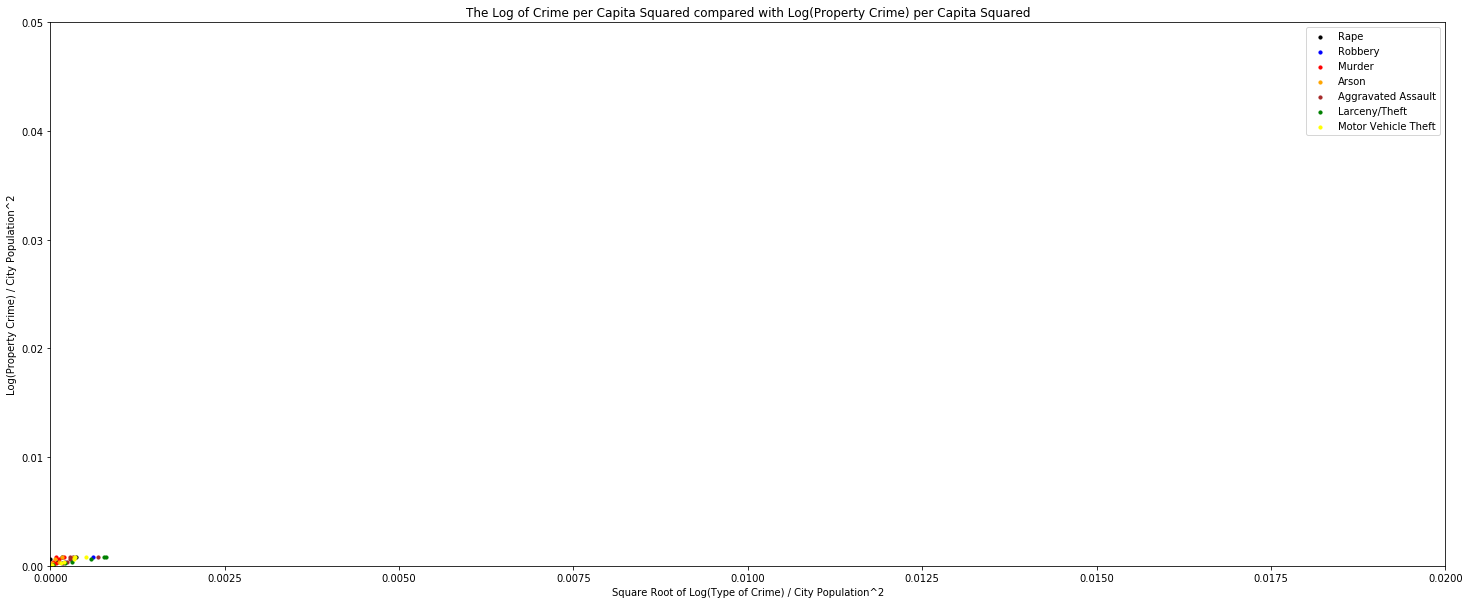

In [97]:
plt.figure(figsize=(25,10))

plt.scatter(x=dflog3['LogRape2'], y=dflog3['LogProp2'], color='black', s=10)
plt.scatter(x=dflog3['LogRobbery2'], y=dflog3['LogProp2'], color='blue', s=10)
plt.scatter(x=dflog3['LogMurder2'], y=dflog3['LogProp2'], color='red', s=10)
plt.scatter(x=dflog3['LogArson2'], y=dflog3['LogProp2'], color='orange', s=10)
plt.scatter(x=dflog3['LogAgAssault2'], y=dflog3['LogProp2'], color='brown', s=10)
plt.scatter(x=dflog3['LogLarceny2'], y=dflog3['LogProp2'], color='green', s=10)
plt.scatter(x=dflog3['LogMotorVehicleTheft2'], y=dflog3['LogProp2'], color='yellow', s=10)

plt.legend(['Rape', 'Robbery', 'Murder', 'Arson', 'Aggravated Assault', 'Larceny/Theft', 'Motor Vehicle Theft'])

plt.title('The Log of Crime per Capita Squared compared with Log(Property Crime) per Capita Squared')
plt.ylabel('Log(Property Crime) / City Population^2')
plt.xlabel('Square Root of Log(Type of Crime) / City Population^2')
plt.ylim(0, 0.05)
plt.xlim(0, 0.02)
plt.show()

In [98]:
dfcorr4 = dflog3[['LogRape2', 'LogRobbery2', 'LogMurder2', 'LogArson2', 'LogAgAssault2', 'LogLarceny2', 
                'LogMotorVehicleTheft2', 'LogProp2']].copy()
corr4 = dfcorr4.corr()
corr4

,LogRape2,LogRobbery2,LogMurder2,LogArson2,LogAgAssault2,LogLarceny2,LogMotorVehicleTheft2,LogProp2
LogRape2,1.000,0.878,0.744,0.975,0.900,0.738,0.791,0.746
LogRobbery2,0.878,1.000,0.957,0.936,0.991,0.926,0.981,0.934
LogMurder2,0.744,0.957,1.000,0.813,0.946,0.866,0.947,0.878
LogArson2,0.975,0.936,0.813,1.000,0.949,0.834,0.879,0.841
LogAgAssault2,0.900,0.991,0.946,0.949,1.000,0.870,0.949,0.881
LogLarceny2,0.738,0.926,0.866,0.834,0.870,1.000,0.976,1.000
LogMotorVehicleTheft2,0.791,0.981,0.947,0.879,0.949,0.976,1.000,0.981
LogProp2,0.746,0.934,0.878,0.841,0.881,1.000,0.981,1.000


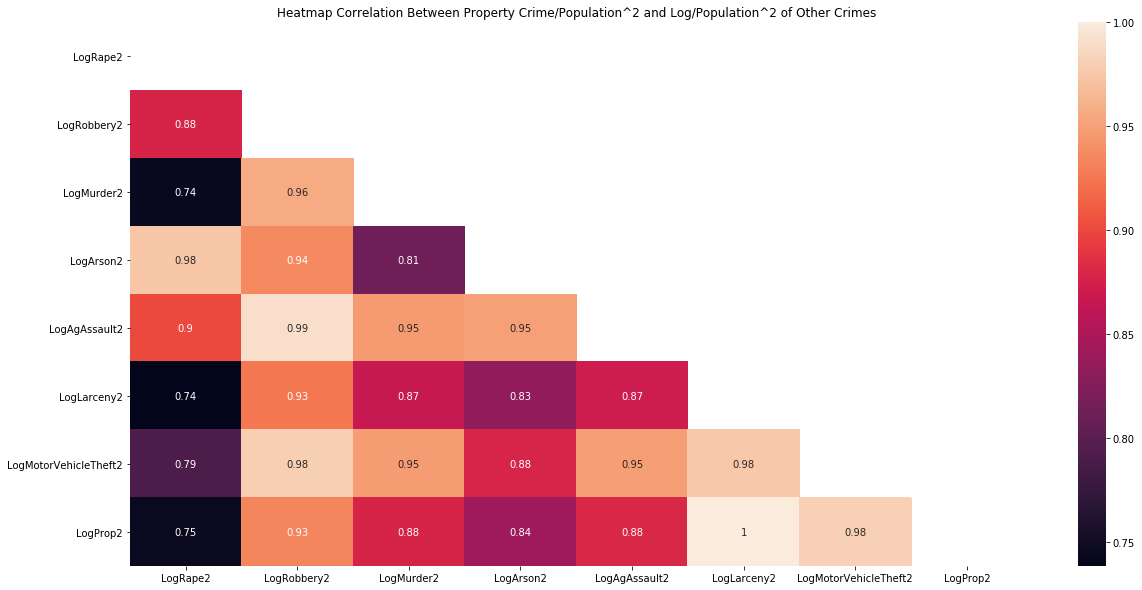

In [99]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr4, mask=mask, xticklabels=dfcorr4.columns, yticklabels=dfcorr4.columns, annot=True)

plt.title('Heatmap Correlation Between Property Crime/Population^2 and Log/Population^2 of Other Crimes')

plt.show()

In [100]:
dffix.head(1)

,City,Violent Crime,Murder/Manslaughter,Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny/Theft,Motor Vehicle Theft,...,Motortheftbool,LogRape2,LogRobbery2,LogMurder2,LogArson2,LogAgAssault2,LogMotorVehicleTheft2,LogLarceny2,LogProp2,LogMVTandRob2
216,New York,"52,384",335,1112,19170,31767,141971,"16,606",117931,7434,...,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


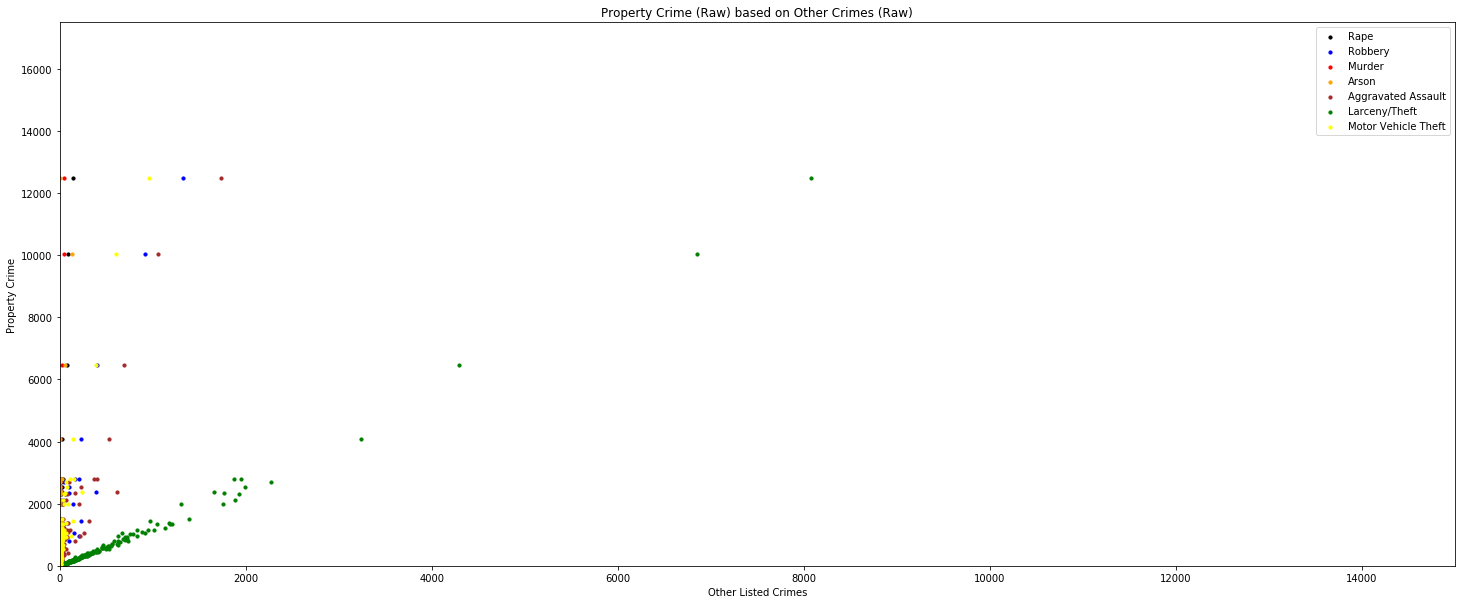

In [101]:
# one final go - showing the basic data:
plt.figure(figsize=(25,10))

plt.scatter(x=dffix['Rape'], y=dffix['Property Crime'], color='black', s=10)
plt.scatter(x=dffix['Robbery'], y=dffix['Property Crime'], color='blue', s=10)
plt.scatter(x=dffix['Murder/Manslaughter'], y=dffix['Property Crime'], color='red', s=10)
plt.scatter(x=dffix['Arson'], y=dffix['Property Crime'], color='orange', s=10)
plt.scatter(x=dffix['Aggravated Assault'], y=dffix['Property Crime'], color='brown', s=10)
plt.scatter(x=dffix['Larceny/Theft'], y=dffix['Property Crime'], color='green', s=10)
plt.scatter(x=dffix['Motor Vehicle Theft'], y=dffix['Property Crime'], color='yellow', s=10)

plt.legend(['Rape', 'Robbery', 'Murder', 'Arson', 'Aggravated Assault', 'Larceny/Theft', 'Motor Vehicle Theft'])

plt.title('Property Crime (Raw) based on Other Crimes (Raw)')
plt.ylabel('Property Crime')
plt.xlabel('Other Listed Crimes')
plt.ylim(0, 17500) # there are outliers for new york
plt.xlim(0, 15000)
plt.show()

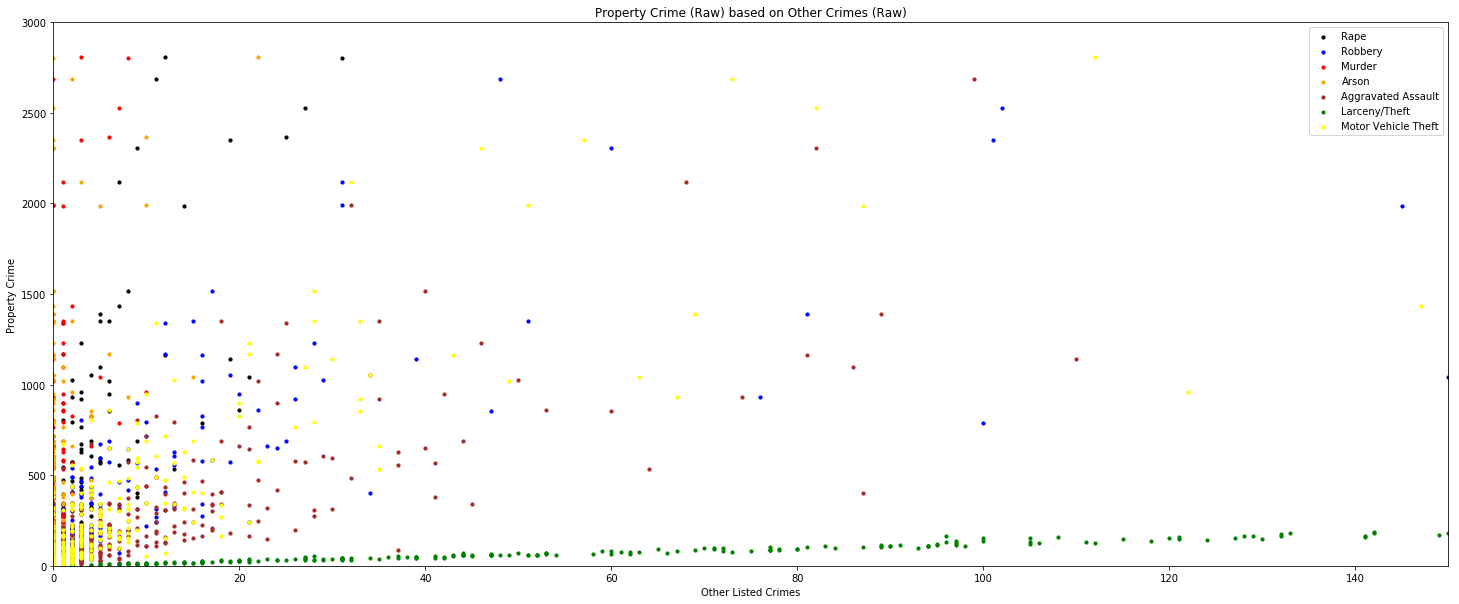

In [102]:
plt.figure(figsize=(25,10))

plt.scatter(x=dffix['Rape'], y=dffix['Property Crime'], color='black', s=10)
plt.scatter(x=dffix['Robbery'], y=dffix['Property Crime'], color='blue', s=10)
plt.scatter(x=dffix['Murder/Manslaughter'], y=dffix['Property Crime'], color='red', s=10)
plt.scatter(x=dffix['Arson'], y=dffix['Property Crime'], color='orange', s=10)
plt.scatter(x=dffix['Aggravated Assault'], y=dffix['Property Crime'], color='brown', s=10)
plt.scatter(x=dffix['Larceny/Theft'], y=dffix['Property Crime'], color='green', s=10)
plt.scatter(x=dffix['Motor Vehicle Theft'], y=dffix['Property Crime'], color='yellow', s=10)

plt.legend(['Rape', 'Robbery', 'Murder', 'Arson', 'Aggravated Assault', 'Larceny/Theft', 'Motor Vehicle Theft'])

plt.title('Property Crime (Raw) based on Other Crimes (Raw)')
plt.ylabel('Property Crime')
plt.xlabel('Other Listed Crimes')
plt.ylim(0, 3000) # there are outliers for new york
plt.xlim(0, 150)
plt.show()

In [103]:
dfcorr5 = dffix[['Rape', 'Robbery', 'Murder/Manslaughter', 'Arson', 'Aggravated Assault', 'Larceny/Theft', 
                'Motor Vehicle Theft', 'Property Crime']].copy()
corr5 = dfcorr5.corr()
corr5

,Rape,Robbery,Murder/Manslaughter,Arson,Aggravated Assault,Larceny/Theft,Motor Vehicle Theft,Property Crime
Rape,1.000,0.995,0.998,0.094,0.994,0.996,0.999,0.998
Robbery,0.995,1.000,0.993,0.047,1.000,0.999,0.997,0.998
Murder/Manslaughter,0.998,0.993,1.000,0.129,0.991,0.993,0.998,0.995
Arson,0.094,0.047,0.129,1.000,0.034,0.062,0.090,0.077
Aggravated Assault,0.994,1.000,0.991,0.034,1.000,0.999,0.995,0.998
Larceny/Theft,0.996,0.999,0.993,0.062,0.999,1.000,0.997,1.000
Motor Vehicle Theft,0.999,0.997,0.998,0.090,0.995,0.997,1.000,0.998
Property Crime,0.998,0.998,0.995,0.077,0.998,1.000,0.998,1.000


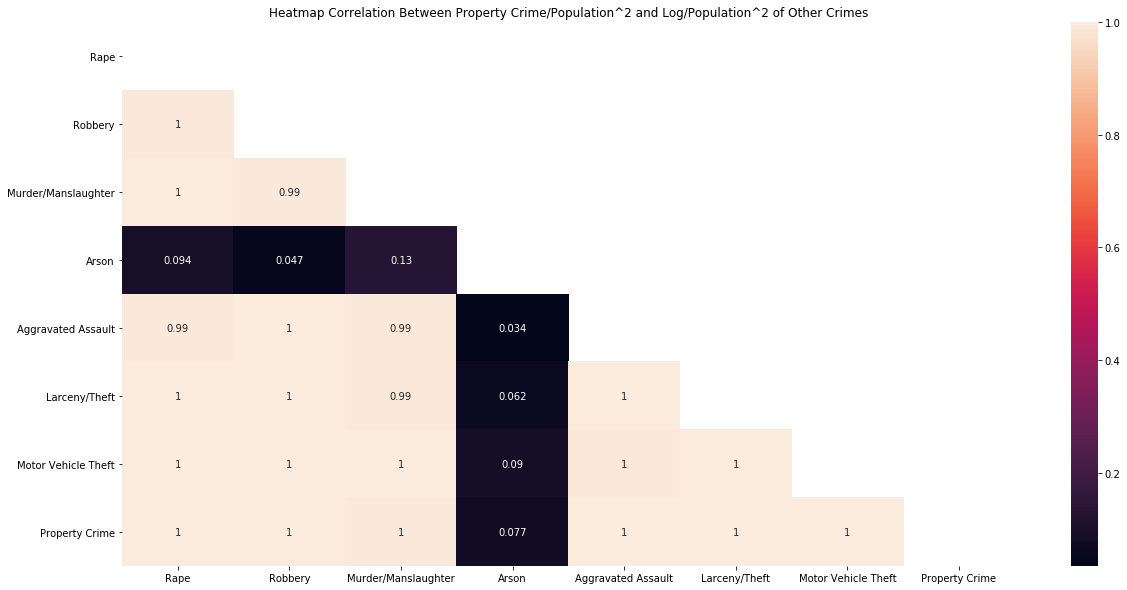

In [104]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr5, mask=mask, xticklabels=dfcorr5.columns, yticklabels=dfcorr5.columns, annot=True)

plt.title('Heatmap Correlation Between Property Crime/Population^2 and Log/Population^2 of Other Crimes')

plt.show()

In [105]:
#uhhhhh what did I do. Was this something I was supposed to figure out?
# welp, gonna run multivariable regression
# maybe make PCA "other crimes" = rape + robbery + murder + agg assault (no arson) + larceny + mvt
# with outcome variable, to keep things even, propcrime * 6

dffix['TotalCrime'] = (dffix['Rape'] + dffix['Robbery'] + dffix['Murder/Manslaughter'] + 
                       dffix['Aggravated Assault'] + dffix['Larceny/Theft'] + dffix['Motor Vehicle Theft'])
dffix['Property Crime5'] = dffix['Property Crime'] * 5

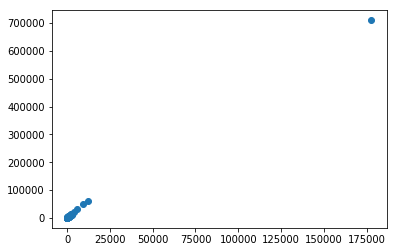

In [106]:
plt.scatter(x=dffix.TotalCrime, y=dffix['Property Crime5'])
plt.show()

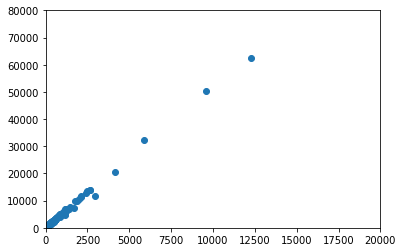

In [107]:
# closer snapshot

plt.scatter(x=dffix.TotalCrime, y=dffix['Property Crime5'])
plt.xlim(0, 20000)
plt.ylim(0, 80000)
plt.show()

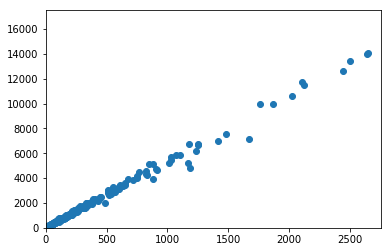

In [108]:
# even closerrrr snapshot
plt.scatter(x=dffix.TotalCrime, y=dffix['Property Crime5'])
plt.xlim(0, 2750)
plt.ylim(0, 17500)
plt.show()

In [109]:
dfcorr6 = dffix[['TotalCrime', 'Property Crime5']].copy()
corr6 = dfcorr6.corr()
corr6

,TotalCrime,Property Crime5
TotalCrime,1.000,1.000
Property Crime5,1.000,1.000


In [110]:
# oooooooooooooooohkay. I'll guess I use that to complete this project.
# now to ***finally*** do the regression model

from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
# ^ decided against using PLSR as I already combined the individual features 
# into a single thing


In [111]:
X = dffix['TotalCrime'].values.reshape(-1,1)
Y = dffix['Property Crime5'].values.reshape(-1,1)

regr = linear_model.LinearRegression()
regr.fit(X,Y)

Y_pred = regr.predict(X)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('R-squared regression:', regr.score(X, Y))#LR R^2 score value


Coefficients: 
 [[4.00368833]]

Intercept: 
 [461.73713153]
R-squared regression: 0.9990217169383608


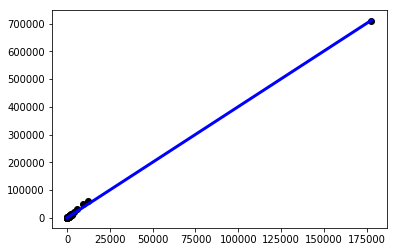

In [112]:
# ha, I'll take it.
# for the final touch - a regression graph:

plt.scatter(X, dffix['Property Crime5'], color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

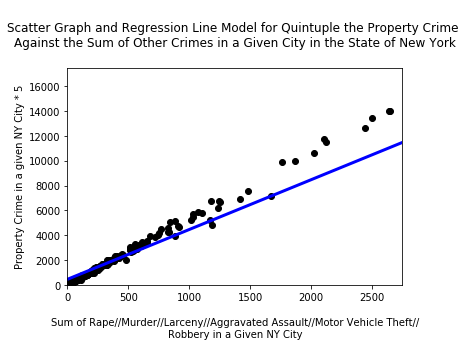

Total Crime does NOT include Arson - weak correlation between that and Property Crime


In [113]:
# Do same thing but zoomed in and with labels

plt.scatter(X, dffix['Property Crime5'], color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)

plt.xlim(0, 2750)
plt.ylim(0, 17500)

plt.title('''
Scatter Graph and Regression Line Model for Quintuple the Property Crime 
Against the Sum of Other Crimes in a Given City in the State of New York
''')
plt.xlabel('''
Sum of Rape//Murder//Larceny//Aggravated Assault//Motor Vehicle Theft//
Robbery in a Given NY City
''')
plt.ylabel('Property Crime in a given NY City * 5')


plt.show()

print('Total Crime does NOT include Arson - weak correlation between that and Property Crime')

In [114]:
# as a penultimate final touch
import statsmodels.api as sm

In [115]:
results = sm.OLS(dffix['Property Crime5'], sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Property Crime5   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.533e+05
Date:                Sat, 26 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:13:51   Log-Likelihood:                -2960.0
No. Observations:                 348   AIC:                             5924.
Df Residuals:                     346   BIC:                             5932.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        461.7371     64.575      7.150      0.000     334.727     588.747
x1             4.0037      0.007    594.420      0.000       3.990       4.017
==============================================================================
Omnibus:                      503.819   Durbin-Watson:                   0.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68087.432
Skew:                           7.381   Prob(JB):                         0.00
Kurtosis:                      69.916   Cond. No.                     9.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

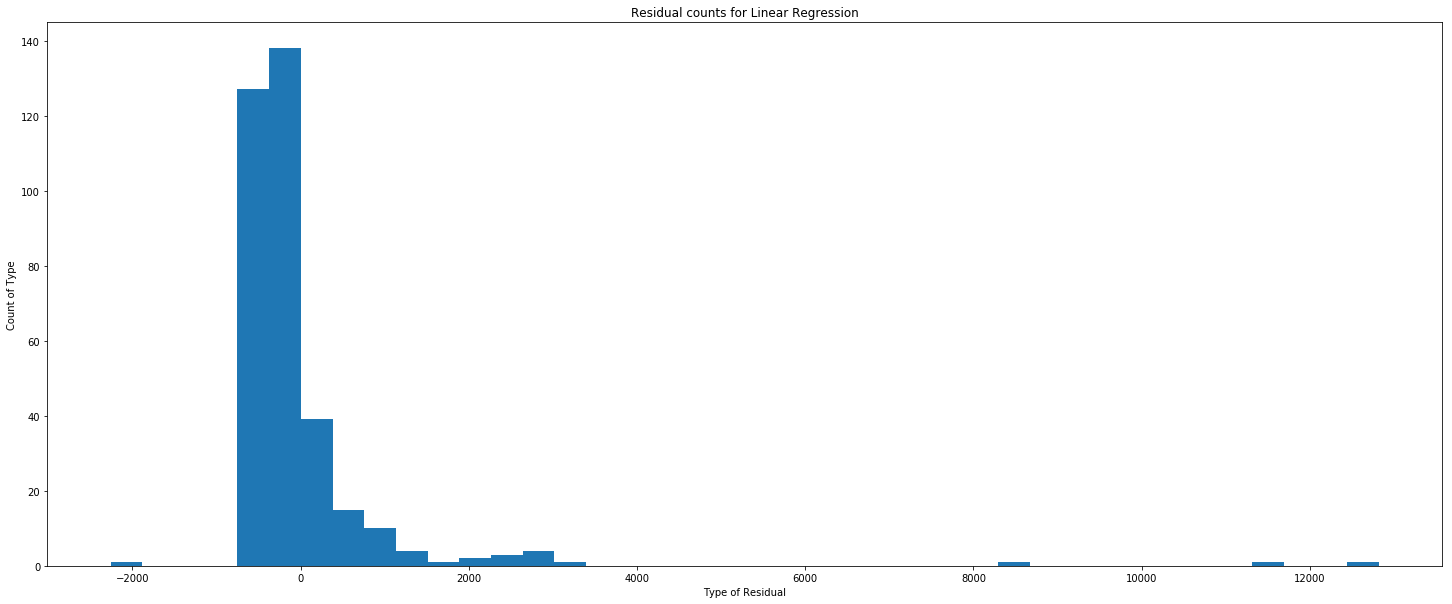

In [116]:
predicted = regr.predict(X).ravel()
actual = dffix['Property Crime5']

# Calculate the residual.
residual = actual - predicted

# Check for density distribution of the residuals.
plt.figure(figsize=(25,10))

plt.hist(residual, bins=40)
plt.title('Residual counts for Linear Regression')
plt.xlabel('Type of Residual')
plt.ylabel('Count of Type')
plt.show()

In [117]:
# welp, could be better.
# NOWWWWWWWW, to do some model application:
dfnew = pd.read_csv('C:/Users/jafon/Documents/PythonMaterials/Data/NYC-2014-Cleaned.csv')

In [118]:
dfnew

,Unnamed: 0,City,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property Crime,Larceny,MV Theft,Arson,TotalCrime,Property Crime5
0,0,Adams Village,"1,851",0,0.000,0.000,0.000,0.000,11.000,10.000,0.000,0.000,10.000,55.000
1,1,Addison Town and Village,"2,568",2,0.000,0.000,1.000,1.000,49.000,47.000,1.000,0.000,50.000,245.000
2,2,Afton Village4,820,0,0.000,nan,0.000,0.000,1.000,1.000,0.000,0.000,1.000,5.000
3,3,Akron Village,"2,842",1,0.000,0.000,0.000,1.000,17.000,17.000,0.000,0.000,18.000,85.000
4,4,Albany4,"98,595",802,8.000,nan,237.000,503.000,3888.000,3083.000,122.000,12.000,3953.000,19440.000
5,5,Albion Village4,"5,872",26,0.000,nan,2.000,21.000,204.000,159.000,4.000,0.000,186.000,1020.000
6,6,Alexandria Bay Village4,"1,107",0,0.000,nan,0.000,0.000,7.000,5.000,0.000,0.000,5.000,35.000
7,7,Alfred Village4,"4,032",11,1.000,nan,0.000,9.000,30.000,24.000,0.000,0.000,34.000,150.000
8,8,Altamont Village4,"1,723",1,0.000,nan,0.000,1.000,2.000,0.000,0.000,0.000,1.000,10.000
9,9,Amherst Town4,"118,860",128,1.000,nan,43.000,68.000,2066.000,1846.000,44.000,2.000,2002.000,10330.000


In [119]:
Xtrain = X # re-clarifying the variables
Ytrain = Y

In [126]:
regr.fit(Xtrain, Ytrain) # training the model with training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [120]:
# Implementing the new testing data from the recently loaded dataframe
Xtest = dfnew['TotalCrime'].values.reshape(-1,1) 
Ytest = dfnew['Property Crime5'].values.reshape(-1,1)

In [124]:
# column 'TotalCrime' has nan values - gotta fix first
# (even though I thought I did this already! Gah!)
from sklearn.preprocessing import Imputer
imputer = Imputer()

Xtest = imputer.fit_transform(Xtest)
Xtest

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[1.00000000e+01],
       [5.00000000e+01],
       [1.00000000e+00],
       [1.80000000e+01],
       [3.95300000e+03],
       [1.86000000e+02],
       [5.00000000e+00],
       [3.40000000e+01],
       [1.00000000e+00],
       [2.00200000e+03],
       [0.00000000e+00],
       [2.00000000e+02],
       [4.10000000e+02],
       [3.00000000e+00],
       [1.80000000e+01],
       [2.00000000e+01],
       [6.00000000e+00],
       [1.20000000e+01],
       [1.50000000e+01],
       [6.50000000e+01],
       [6.00000000e+01],
       [5.38000000e+02],
       [1.38000000e+02],
       [2.47000000e+02],
       [1.12000000e+02],
       [4.23000000e+02],
       [1.96100000e+03],
       [2.00000000e+00],
       [7.60000000e+01],
       [6.00000000e+00],
       [1.10000000e+01],
       [1.30000000e+01],
       [7.00000000e+00],
       [1.50000000e+01],
       [8.01000000e+02],
       [1.14000000e+02],
       [2.20000000e+01],
       [4.00000000e+00],
       [1.23300000e+04],
       [4.50000000e+01],


In [127]:
Ypred = regr.predict(Xtest)

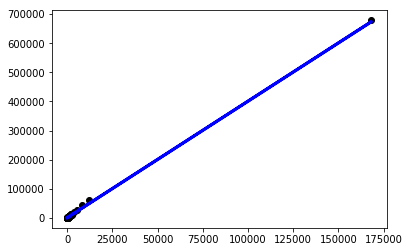

In [129]:
# Checking the overall score for Ypred, THEN cross-validating to check the
# accuracy of that score
plt.scatter(Xtest, Ytest,  color='black')
plt.plot(Xtest, Ypred, color='blue', linewidth=3)

plt.show()

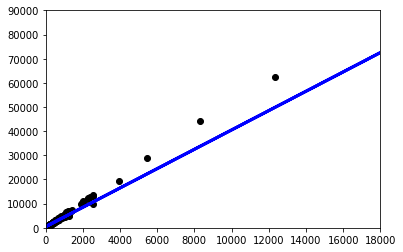

In [130]:
plt.scatter(Xtest, Ytest,  color='black')
plt.plot(Xtest, Ypred, color='blue', linewidth=3)

plt.xlim(0,18000)
plt.ylim(0,90000)

plt.show()

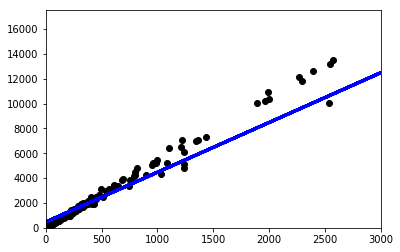

In [131]:
plt.scatter(Xtest, Ytest,  color='black')
plt.plot(Xtest, Ypred, color='blue', linewidth=3)

plt.xlim(0,3000)
plt.ylim(0,17500)

plt.show()

In [140]:
model = sm.OLS(Xtrain, Ytrain)
results = model.fit()
print ("R Squared", results.rsquared)

R Squared 0.9988890875516602


In [138]:
# fixing y values too now:
Ytest = imputer.fit_transform(Ytest)
Ytest

array([[5.50000000e+01],
       [2.45000000e+02],
       [5.00000000e+00],
       [8.50000000e+01],
       [1.94400000e+04],
       [1.02000000e+03],
       [3.50000000e+01],
       [1.50000000e+02],
       [1.00000000e+01],
       [1.03300000e+04],
       [0.00000000e+00],
       [9.90000000e+02],
       [2.45000000e+03],
       [3.00000000e+01],
       [1.25000000e+02],
       [1.25000000e+02],
       [3.00000000e+01],
       [6.00000000e+01],
       [7.00000000e+01],
       [3.25000000e+02],
       [3.65000000e+02],
       [2.99500000e+03],
       [7.40000000e+02],
       [1.22500000e+03],
       [6.15000000e+02],
       [2.27000000e+03],
       [1.02400000e+04],
       [1.50000000e+01],
       [4.30000000e+02],
       [4.50000000e+01],
       [5.00000000e+01],
       [1.05000000e+02],
       [4.50000000e+01],
       [8.50000000e+01],
       [4.27000000e+03],
       [6.40000000e+02],
       [1.25000000e+02],
       [2.50000000e+01],
       [6.22450000e+04],
       [2.75000000e+02],


In [139]:
print("R Squared", regr.score(Xtest, Ytest))

R Squared 0.9990304704743629


In [142]:
# Those values look good!
# Now to cross-validate?
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xtest, Ytest,
                                                  test_size=0.2, random_state=0)

In [143]:
testaccuracy = regr.score(Xtest,Ytest)

In [144]:
print(results)
print(testaccuracy)

0.9990304704743629


In [146]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr.fit(Xtrain, Ytrain), Xtest, Ytest, cv=10)


array([0.96158228, 0.95865981, 0.88618873, 0.94381596, 0.91674708,
       0.95153686, 0.92493405, 0.94100216, 0.94288802, 0.96530004])

^^^Somewhat overfitted...but I can live with that.


The answer to the question from the assignment - why do this cross-validation technique????

ANSWER: <br>
Folds are a great way to see if my model is overfitted...which I guess it is. 